In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yaml
import os 
import tqdm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
sns.set_theme(style="white", context="talk", palette="muted")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14,         
    'axes.titlesize': 15,
    'axes.labelsize': 13,    
    'legend.fontsize': 11,   
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 100
})

In [3]:
# Read config.yaml
with open('../configs/config_banikoara.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

# extract data params
data_params = config['data_params']

### Read the csv file

In [4]:
dataset_path = data_params['data_path'] + 'raw/' + data_params['dataset']
data = pd.read_csv(dataset_path)  
data.head(20)

,DATE,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6,Moving_Sum_6
0,31/1/1981,98.05,22.05,34.62,58.69,2.73,0.55,NaN,NaN,0.00,NaN,NaN,NaN
1,28/2/1981,97.85,26.33,24.62,73.88,2.71,0.52,NaN,NaN,0.00,NaN,NaN,NaN
2,31/3/1981,97.75,30.48,34.56,105.81,2.16,0.51,NaN,NaN,5.27,NaN,NaN,NaN
3,30/4/1981,97.66,30.79,50.38,215.50,2.62,0.50,NaN,NaN,42.19,NaN,NaN,NaN
4,31/5/1981,97.85,28.11,71.88,233.12,2.42,0.52,NaN,NaN,94.92,NaN,NaN,NaN
5,30/6/1981,97.99,28.12,71.06,220.44,2.39,0.54,NaN,NaN,226.76,NaN,-0.111216,369.14
6,31/7/1981,98.03,25.51,82.50,230.19,2.16,0.62,NaN,NaN,237.30,NaN,0.747892,606.44
7,31/8/1981,98.02,25.32,84.00,231.25,1.62,0.66,NaN,NaN,242.58,NaN,1.626116,849.02
8,30/9/1981,98.04,25.25,84.19,222.94,1.49,0.75,NaN,NaN,184.57,NaN,2.275244,1028.32
9,31/10/1981,97.92,26.27,75.75,201.06,1.42,0.71,NaN,NaN,0.00,NaN,2.122502,986.13


In [5]:
data.shape

(492, 13)

In [6]:
data.describe()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6,Moving_Sum_6
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,456.000000,456.000000,492.000000,456.000000,4.870000e+02,487.000000
mean,97.903963,27.561707,53.031992,155.935081,2.254614,0.533354,49.743224,35.247237,66.271524,20.531031,7.842232e-17,399.859692
std,0.147023,2.589921,23.243314,72.824601,0.552562,0.052559,19.380463,2.661197,80.382083,1.601459,1.000000e+00,276.216636
min,97.460000,21.070000,12.310000,24.440000,1.190000,0.480000,10.450000,30.230000,0.000000,15.840000,-1.447631e+00,0.000000
25%,97.807500,25.795000,31.560000,73.120000,1.787500,0.490000,31.760000,33.455000,0.000000,19.380000,-9.703604e-01,131.830000
50%,97.940000,26.870000,54.095000,197.095000,2.290000,0.520000,55.355000,36.680000,26.370000,20.645000,-1.574739e-02,395.510000
75%,98.010000,29.370000,75.327500,220.955000,2.652500,0.560000,65.800000,37.357500,126.560000,21.635000,9.197321e-01,653.905000
max,98.350000,34.230000,86.620000,345.810000,3.820000,0.750000,84.090000,37.880000,326.950000,25.260000,2.275244e+00,1028.320000


In [7]:
dataset_path

'../datasets/raw/Banikoara_with_SPI6.csv'

In [8]:
# Ensure the date column is a datetime
data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=True)

# Set the date column as the index and drop it from the columns
data = data.set_index('DATE')

data
# data.head()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6,Moving_Sum_6
DATE,,,,,,,,,,,,
1981-01-31,98.05,22.05,34.62,58.69,2.73,0.55,NaN,NaN,0.00,NaN,NaN,NaN
1981-02-28,97.85,26.33,24.62,73.88,2.71,0.52,NaN,NaN,0.00,NaN,NaN,NaN
1981-03-31,97.75,30.48,34.56,105.81,2.16,0.51,NaN,NaN,5.27,NaN,NaN,NaN
1981-04-30,97.66,30.79,50.38,215.50,2.62,0.50,NaN,NaN,42.19,NaN,NaN,NaN
1981-05-31,97.85,28.11,71.88,233.12,2.42,0.52,NaN,NaN,94.92,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,98.04,25.60,85.19,224.38,1.54,0.59,78.71,37.45,274.77,17.65,0.818598,625.97
2021-09-30,98.02,25.99,83.31,201.19,1.38,0.66,63.51,36.71,174.17,18.76,1.391880,784.32
2021-10-31,97.91,27.53,71.56,131.94,1.31,0.63,44.27,34.57,27.63,21.95,1.457227,802.37


Delete the 'Moving_Sum_6' column (it is not a variable but just serve to compute SPI6)

In [9]:
data = data.drop(columns='Moving_Sum_6', axis=1)
data

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
DATE,,,,,,,,,,,
1981-01-31,98.05,22.05,34.62,58.69,2.73,0.55,NaN,NaN,0.00,NaN,NaN
1981-02-28,97.85,26.33,24.62,73.88,2.71,0.52,NaN,NaN,0.00,NaN,NaN
1981-03-31,97.75,30.48,34.56,105.81,2.16,0.51,NaN,NaN,5.27,NaN,NaN
1981-04-30,97.66,30.79,50.38,215.50,2.62,0.50,NaN,NaN,42.19,NaN,NaN
1981-05-31,97.85,28.11,71.88,233.12,2.42,0.52,NaN,NaN,94.92,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,98.04,25.60,85.19,224.38,1.54,0.59,78.71,37.45,274.77,17.65,0.818598
2021-09-30,98.02,25.99,83.31,201.19,1.38,0.66,63.51,36.71,174.17,18.76,1.391880
2021-10-31,97.91,27.53,71.56,131.94,1.31,0.63,44.27,34.57,27.63,21.95,1.457227


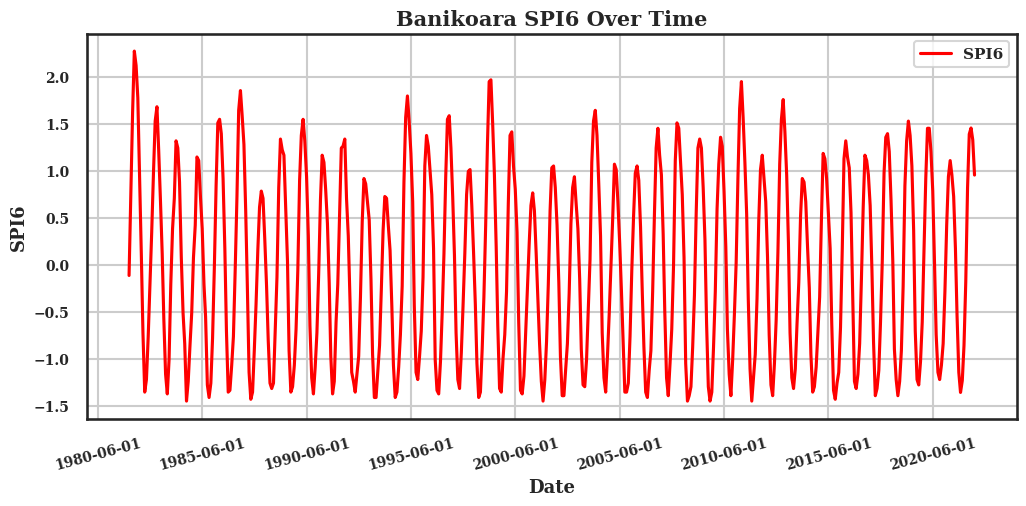

In [10]:
import matplotlib.dates as mdates

# Plot SPI6 in function of Date
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['SPI6'], label='SPI6', color='red')

# Adding grid
plt.grid(True)

# Adding Title
plt.title(data_params['city'] + ' SPI6 Over Time', fontweight='bold')

# Annotating x and y axis
plt.xlabel('Date', fontweight='bold')
plt.ylabel('SPI6', fontweight='bold')

# Rotate dates on x-axis and bold the ticks
plt.xticks(rotation=15, fontweight='bold')
plt.yticks(fontweight='bold')

# Adding legend with bold font
plt.legend(prop={'weight': 'bold'}, fontsize='large')

# Set the major locator for x-axis to show every 5th year in June
five_years = mdates.YearLocator(5)  # every 5 years
june_locator = mdates.MonthLocator(6)  # Add ticks only for June
plt.gca().xaxis.set_major_locator(five_years)
plt.gca().xaxis.set_minor_locator(june_locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Adjust the format to only show June 1st for every 5 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-06-01'))

# Saving the figure before showing
plt.savefig(data_params['save_path'] + data_params['city'] + '/spi6_plot.png')

# Show the plot
plt.show()


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 492 entries, 1981-01-31 to 2021-12-31
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PS                 492 non-null    float64
 1   T2M                492 non-null    float64
 2   RH2M               492 non-null    float64
 3   WD2M               492 non-null    float64
 4   WS2M               492 non-null    float64
 5   GWETPROF           492 non-null    float64
 6   CLOUD_AMT          456 non-null    float64
 7   TOA_SW_DWN         456 non-null    float64
 8   PRECTOTCORR_SUM    492 non-null    float64
 9   ALLSKY_SFC_SW_DWN  456 non-null    float64
 10  SPI6               487 non-null    float64
dtypes: float64(11)
memory usage: 46.1 KB


In [12]:
data.describe()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,456.000000,456.000000,492.000000,456.000000,4.870000e+02
mean,97.903963,27.561707,53.031992,155.935081,2.254614,0.533354,49.743224,35.247237,66.271524,20.531031,7.842232e-17
std,0.147023,2.589921,23.243314,72.824601,0.552562,0.052559,19.380463,2.661197,80.382083,1.601459,1.000000e+00
min,97.460000,21.070000,12.310000,24.440000,1.190000,0.480000,10.450000,30.230000,0.000000,15.840000,-1.447631e+00
25%,97.807500,25.795000,31.560000,73.120000,1.787500,0.490000,31.760000,33.455000,0.000000,19.380000,-9.703604e-01
50%,97.940000,26.870000,54.095000,197.095000,2.290000,0.520000,55.355000,36.680000,26.370000,20.645000,-1.574739e-02
75%,98.010000,29.370000,75.327500,220.955000,2.652500,0.560000,65.800000,37.357500,126.560000,21.635000,9.197321e-01
max,98.350000,34.230000,86.620000,345.810000,3.820000,0.750000,84.090000,37.880000,326.950000,25.260000,2.275244e+00


In [13]:
data.isnull().sum()

PS                    0
T2M                   0
RH2M                  0
WD2M                  0
WS2M                  0
GWETPROF              0
CLOUD_AMT            36
TOA_SW_DWN           36
PRECTOTCORR_SUM       0
ALLSKY_SFC_SW_DWN    36
SPI6                  5
dtype: int64

In [14]:
data.isnull().sum()/len(data)*100

PS                   0.000000
T2M                  0.000000
RH2M                 0.000000
WD2M                 0.000000
WS2M                 0.000000
GWETPROF             0.000000
CLOUD_AMT            7.317073
TOA_SW_DWN           7.317073
PRECTOTCORR_SUM      0.000000
ALLSKY_SFC_SW_DWN    7.317073
SPI6                 1.016260
dtype: float64

The target variable presents 5 missing entries, and covariates CLOUD_AMT,  TOA_SW_DWN, and ALLSKY_SFC_SW_DWN have respectively 36 missing values ($\textbf{7.317\%}$) of the total. They will be all removed to avoid noise, additional bias, and perturbation.

The 5 first missing entries of the target value represent the 5 first lines use to compute the SPI6

### Remove (CLOUD_AMT,  TOA_SW_DWN, and ALLSKY_SFC_SW_DWN) covariates and first five entries of the dataset 


In [15]:
data[:7]

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
DATE,,,,,,,,,,,
1981-01-31,98.05,22.05,34.62,58.69,2.73,0.55,NaN,NaN,0.00,NaN,NaN
1981-02-28,97.85,26.33,24.62,73.88,2.71,0.52,NaN,NaN,0.00,NaN,NaN
1981-03-31,97.75,30.48,34.56,105.81,2.16,0.51,NaN,NaN,5.27,NaN,NaN
1981-04-30,97.66,30.79,50.38,215.50,2.62,0.50,NaN,NaN,42.19,NaN,NaN
1981-05-31,97.85,28.11,71.88,233.12,2.42,0.52,NaN,NaN,94.92,NaN,NaN
1981-06-30,97.99,28.12,71.06,220.44,2.39,0.54,NaN,NaN,226.76,NaN,-0.111216
1981-07-31,98.03,25.51,82.50,230.19,2.16,0.62,NaN,NaN,237.30,NaN,0.747892


In [16]:
COLUMNS_TO_REMOVE = ['CLOUD_AMT', 'TOA_SW_DWN', 'ALLSKY_SFC_SW_DWN']
data = data.drop(columns=COLUMNS_TO_REMOVE, axis=1).dropna()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487 entries, 1981-06-30 to 2021-12-31
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PS               487 non-null    float64
 1   T2M              487 non-null    float64
 2   RH2M             487 non-null    float64
 3   WD2M             487 non-null    float64
 4   WS2M             487 non-null    float64
 5   GWETPROF         487 non-null    float64
 6   PRECTOTCORR_SUM  487 non-null    float64
 7   SPI6             487 non-null    float64
dtypes: float64(8)
memory usage: 34.2 KB


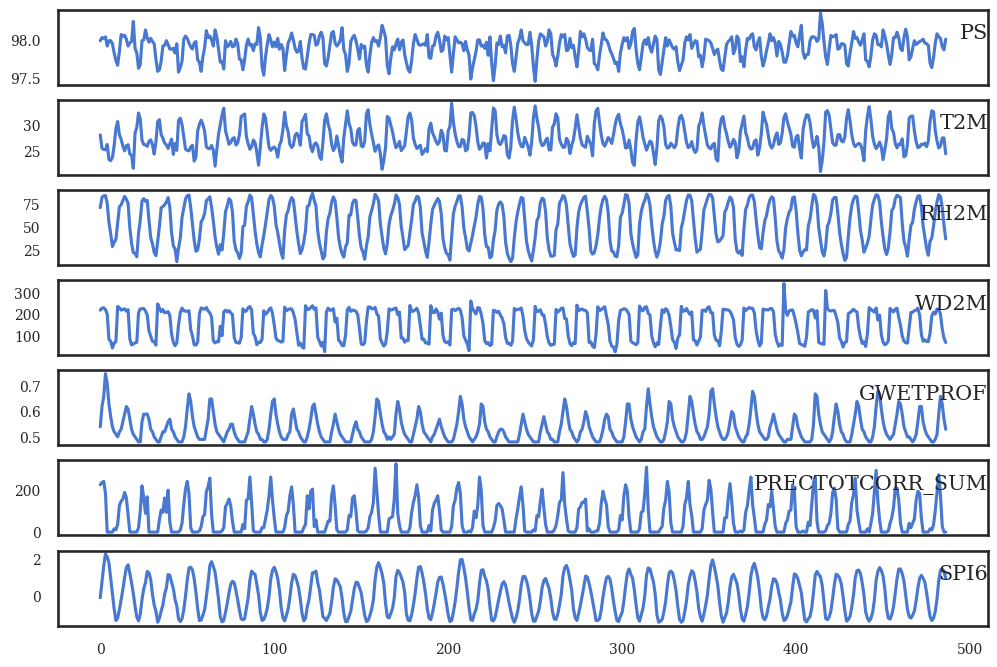

In [18]:
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure(figsize=(12,8))
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(data.values[:, group])
 plt.title(data.columns[group], y=0.5, loc='right')
 i += 1
plt.show()

#### Normalization
 The scale of the features are big comparatively to the target SPI6. Let's normalize those features 

In [19]:
feature_range = (-1, 1)

# Separate the target column from the other columns
features = data.drop(columns=['SPI6'])
target = data['SPI6']

# Initialize and fit scaler on train data if needed
scaler_type = data_params['scaling_type']
if scaler_type == 'minmax':
    scaler = MinMaxScaler(feature_range=feature_range)
elif scaler_type == 'standard':
    scaler = StandardScaler()
elif scaler_type == 'none':
    scaler = None
else:
    raise ValueError(f"Unsupported scaler_type: {scaler_type}")

normalized_features = scaler.fit_transform(features)

# Convert the normalized features back to a DataFrame
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns, index=data.index)

# Reconstruct the DataFrame with the normalized columns and the target column
normalized_data = pd.concat([normalized_features_df, target], axis=1)

# Display the head of the new DataFrame
# normalized_data.head()
normalized_data

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
DATE,,,,,,,,
1981-06-30,0.191011,0.071429,0.581214,0.219778,-0.087452,-0.555556,0.387123,-0.111216
1981-07-31,0.280899,-0.325228,0.889113,0.280456,-0.262357,0.037037,0.451598,0.747892
1981-08-31,0.258427,-0.354103,0.929485,0.287052,-0.673004,0.333333,0.483897,1.626116
1981-09-30,0.303371,-0.364742,0.934598,0.235336,-0.771863,1.000000,0.129041,2.275244
1981-10-31,0.033708,-0.209726,0.707442,0.099169,-0.825095,0.703704,-1.000000,2.122502
...,...,...,...,...,...,...,...,...
2021-08-31,0.303371,-0.311550,0.961513,0.244298,-0.733840,-0.185185,0.680807,0.818598
2021-09-30,0.258427,-0.252280,0.910914,0.099978,-0.855513,0.333333,0.065423,1.391880
2021-10-31,0.011236,-0.018237,0.594671,-0.330989,-0.908745,0.111111,-0.830983,1.457227


### Pearson Correlation

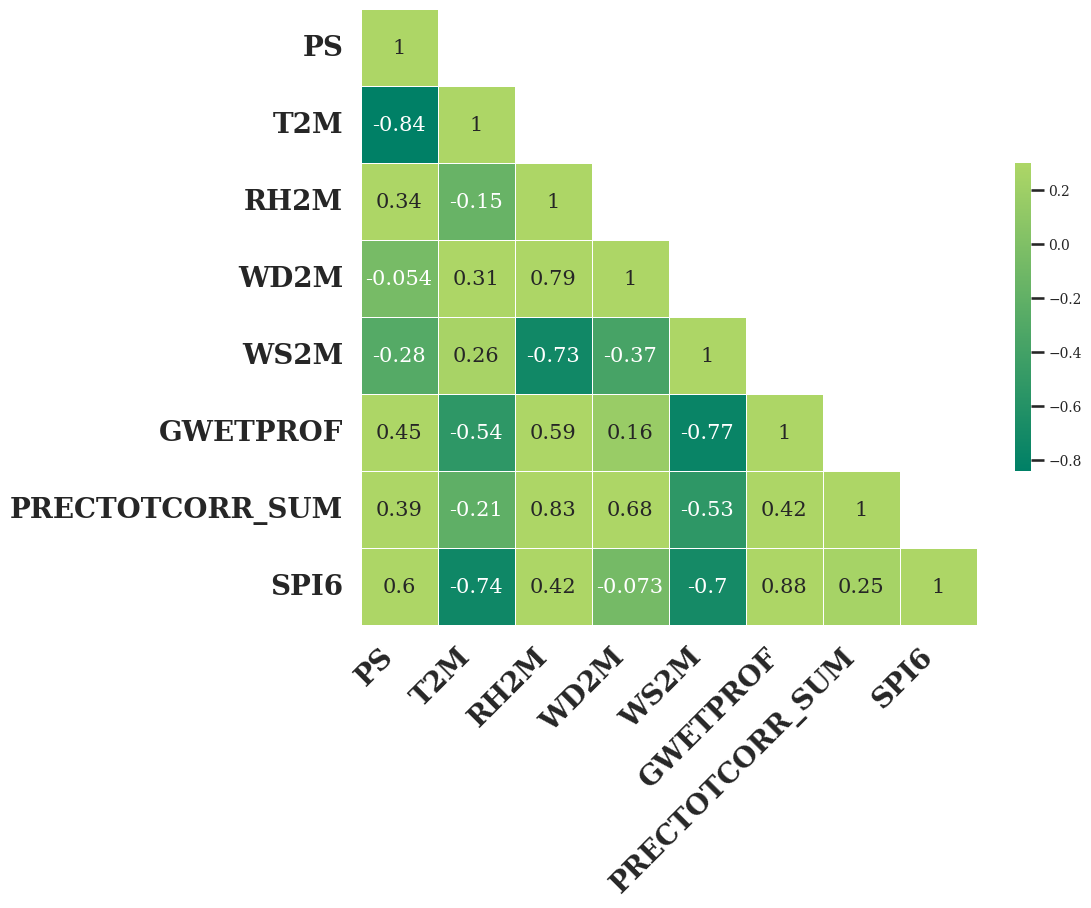

In [20]:
# Compute the correlation matrix
corr = normalized_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
# plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = 'summer'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size":15})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=20, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=20, fontweight='bold')
#plt.savefig('banikoara_heatmap_correlation')
plt.show()

#### Let's focus on the corelations between each variable and target variable

In [21]:
target_column = 'SPI6'

In [22]:
correlations_data = normalized_data.corr()[target_column].sort_values(ascending=False)
correlations_data

SPI6               1.000000
GWETPROF           0.882607
PS                 0.598602
RH2M               0.423335
PRECTOTCORR_SUM    0.254686
WD2M              -0.072987
WS2M              -0.696878
T2M               -0.737511
Name: SPI6, dtype: float64

In [23]:
correlations_data = np.abs(normalized_data.corr()[target_column]).sort_values(ascending=False)
correlations_data

SPI6               1.000000
GWETPROF           0.882607
T2M                0.737511
WS2M               0.696878
PS                 0.598602
RH2M               0.423335
PRECTOTCORR_SUM    0.254686
WD2M               0.072987
Name: SPI6, dtype: float64

We can remove WD2M as the coefficient is very low

In [24]:
normalized_data = normalized_data.drop(columns=['WD2M'])
normalized_data.head()

,PS,T2M,RH2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
DATE,,,,,,,
1981-06-30,0.191011,0.071429,0.581214,-0.087452,-0.555556,0.387123,-0.111216
1981-07-31,0.280899,-0.325228,0.889113,-0.262357,0.037037,0.451598,0.747892
1981-08-31,0.258427,-0.354103,0.929485,-0.673004,0.333333,0.483897,1.626116
1981-09-30,0.303371,-0.364742,0.934598,-0.771863,1.000000,0.129041,2.275244
1981-10-31,0.033708,-0.209726,0.707442,-0.825095,0.703704,-1.000000,2.122502


In [25]:
normalized_data

,PS,T2M,RH2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
DATE,,,,,,,
1981-06-30,0.191011,0.071429,0.581214,-0.087452,-0.555556,0.387123,-0.111216
1981-07-31,0.280899,-0.325228,0.889113,-0.262357,0.037037,0.451598,0.747892
1981-08-31,0.258427,-0.354103,0.929485,-0.673004,0.333333,0.483897,1.626116
1981-09-30,0.303371,-0.364742,0.934598,-0.771863,1.000000,0.129041,2.275244
1981-10-31,0.033708,-0.209726,0.707442,-0.825095,0.703704,-1.000000,2.122502
...,...,...,...,...,...,...,...
2021-08-31,0.303371,-0.311550,0.961513,-0.733840,-0.185185,0.680807,0.818598
2021-09-30,0.258427,-0.252280,0.910914,-0.855513,0.333333,0.065423,1.391880
2021-10-31,0.011236,-0.018237,0.594671,-0.908745,0.111111,-0.830983,1.457227


In [26]:
no_lagged_data_path = data_params['data_path'] + 'no_lagged/' + data_params['city'] + '_no_lagged.csv'
normalized_data.to_csv(no_lagged_data_path)

### Transform dataset for Time series forecasting

In [27]:
import sys
sys.path.append('../')

from models.utils import create_lagged_features

2025-08-04 22:29:56.801767: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-04 22:29:56.828246: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-04 22:29:56.864346: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-04 22:29:56.864412: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-04 22:29:56.887804: I tensorflow/core/platform/cpu_feature_gua

In [28]:
col_names = list(normalized_data.columns)
print(col_names)

['PS', 'T2M', 'RH2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM', 'SPI6']


In [29]:
lagged_data = create_lagged_features(data= normalized_data, 
                                      col_names=col_names,
                                      n_in=data_params['window_size'],
                                      n_out=data_params['n_output_steps'],
                                      dropnan=True)

lagged_data.head()

,PS(t-5),T2M(t-5),RH2M(t-5),WS2M(t-5),GWETPROF(t-5),PRECTOTCORR_SUM(t-5),SPI6(t-5),PS(t-4),T2M(t-4),RH2M(t-4),...,GWETPROF(t-1),PRECTOTCORR_SUM(t-1),SPI6(t-1),PS(t),T2M(t),RH2M(t),WS2M(t),GWETPROF(t),PRECTOTCORR_SUM(t),SPI6(t)
DATE,,,,,,,,,,,,,,,,,,,,,
1981-11-30,0.191011,0.071429,0.581214,-0.087452,-0.555556,0.387123,-0.111216,0.280899,-0.325228,0.889113,...,0.703704,-1.000000,2.122502,0.191011,-0.647416,0.152200,-0.346008,0.111111,-1.000000,1.778858
1981-12-31,0.280899,-0.325228,0.889113,-0.262357,0.037037,0.451598,0.747892,0.258427,-0.354103,0.929485,...,0.111111,-1.000000,1.778858,0.191011,-0.683891,-0.184228,-0.292776,-0.259259,-1.000000,0.957909
1982-01-31,0.258427,-0.354103,0.929485,-0.673004,0.333333,0.483897,1.626116,0.303371,-0.364742,0.934598,...,-0.259259,-1.000000,0.957909,0.101124,-0.586626,-0.559144,0.140684,-0.555556,-1.000000,0.098800
1982-02-28,0.303371,-0.364742,0.934598,-0.771863,1.000000,0.129041,2.275244,0.033708,-0.209726,0.707442,...,-0.555556,-1.000000,0.098800,-0.168539,-0.240122,-0.431301,-0.019011,-0.703704,-0.903227,-0.722149
1982-03-31,0.033708,-0.209726,0.707442,-0.825095,0.703704,-1.000000,2.122502,0.191011,-0.647416,0.152200,...,-0.703704,-0.903227,-0.722149,-0.393258,0.258359,-0.347329,0.019011,-0.777778,-0.935464,-1.352162


In [30]:
lagged_data

,PS(t-5),T2M(t-5),RH2M(t-5),WS2M(t-5),GWETPROF(t-5),PRECTOTCORR_SUM(t-5),SPI6(t-5),PS(t-4),T2M(t-4),RH2M(t-4),...,GWETPROF(t-1),PRECTOTCORR_SUM(t-1),SPI6(t-1),PS(t),T2M(t),RH2M(t),WS2M(t),GWETPROF(t),PRECTOTCORR_SUM(t),SPI6(t)
DATE,,,,,,,,,,,,,,,,,,,,,
1981-11-30,0.191011,0.071429,0.581214,-0.087452,-0.555556,0.387123,-0.111216,0.280899,-0.325228,0.889113,...,0.703704,-1.000000,2.122502,0.191011,-0.647416,0.152200,-0.346008,0.111111,-1.000000,1.778858
1981-12-31,0.280899,-0.325228,0.889113,-0.262357,0.037037,0.451598,0.747892,0.258427,-0.354103,0.929485,...,0.111111,-1.000000,1.778858,0.191011,-0.683891,-0.184228,-0.292776,-0.259259,-1.000000,0.957909
1982-01-31,0.258427,-0.354103,0.929485,-0.673004,0.333333,0.483897,1.626116,0.303371,-0.364742,0.934598,...,-0.259259,-1.000000,0.957909,0.101124,-0.586626,-0.559144,0.140684,-0.555556,-1.000000,0.098800
1982-02-28,0.303371,-0.364742,0.934598,-0.771863,1.000000,0.129041,2.275244,0.033708,-0.209726,0.707442,...,-0.555556,-1.000000,0.098800,-0.168539,-0.240122,-0.431301,-0.019011,-0.703704,-0.903227,-0.722149
1982-03-31,0.033708,-0.209726,0.707442,-0.825095,0.703704,-1.000000,2.122502,0.191011,-0.647416,0.152200,...,-0.703704,-0.903227,-0.722149,-0.393258,0.258359,-0.347329,0.019011,-0.777778,-0.935464,-1.352162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,-0.460674,0.474164,-0.406002,0.262357,-0.925926,-0.903227,-1.142182,-0.595506,0.776596,-0.305342,...,-0.777778,0.146047,-0.176165,0.303371,-0.311550,0.961513,-0.733840,-0.185185,0.680807,0.818598
2021-09-30,-0.595506,0.776596,-0.305342,0.315589,-1.000000,-0.941398,-1.355674,-0.303371,0.749240,0.041313,...,-0.185185,0.680807,0.818598,0.258427,-0.252280,0.910914,-0.855513,0.333333,0.065423,1.391880
2021-10-31,-0.303371,0.749240,0.041313,0.361217,-1.000000,-0.786634,-1.229396,0.123596,0.197568,0.471942,...,0.333333,0.065423,1.391880,0.011236,-0.018237,0.594671,-0.908745,0.111111,-0.830983,1.457227


### Now we have 42 columns. Lets reduce them

### Select the most useful lags. 

Let's plot correlation matrice by including for each the target TWS and others with a  given lag_lenth

In [31]:
normalized_data.columns

Index(['PS', 'T2M', 'RH2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM', 'SPI6'], dtype='object')

In [32]:
lagged_data.columns

Index(['PS(t-5)', 'T2M(t-5)', 'RH2M(t-5)', 'WS2M(t-5)', 'GWETPROF(t-5)',
       'PRECTOTCORR_SUM(t-5)', 'SPI6(t-5)', 'PS(t-4)', 'T2M(t-4)', 'RH2M(t-4)',
       'WS2M(t-4)', 'GWETPROF(t-4)', 'PRECTOTCORR_SUM(t-4)', 'SPI6(t-4)',
       'PS(t-3)', 'T2M(t-3)', 'RH2M(t-3)', 'WS2M(t-3)', 'GWETPROF(t-3)',
       'PRECTOTCORR_SUM(t-3)', 'SPI6(t-3)', 'PS(t-2)', 'T2M(t-2)', 'RH2M(t-2)',
       'WS2M(t-2)', 'GWETPROF(t-2)', 'PRECTOTCORR_SUM(t-2)', 'SPI6(t-2)',
       'PS(t-1)', 'T2M(t-1)', 'RH2M(t-1)', 'WS2M(t-1)', 'GWETPROF(t-1)',
       'PRECTOTCORR_SUM(t-1)', 'SPI6(t-1)', 'PS(t)', 'T2M(t)', 'RH2M(t)',
       'WS2M(t)', 'GWETPROF(t)', 'PRECTOTCORR_SUM(t)', 'SPI6(t)'],
      dtype='object')

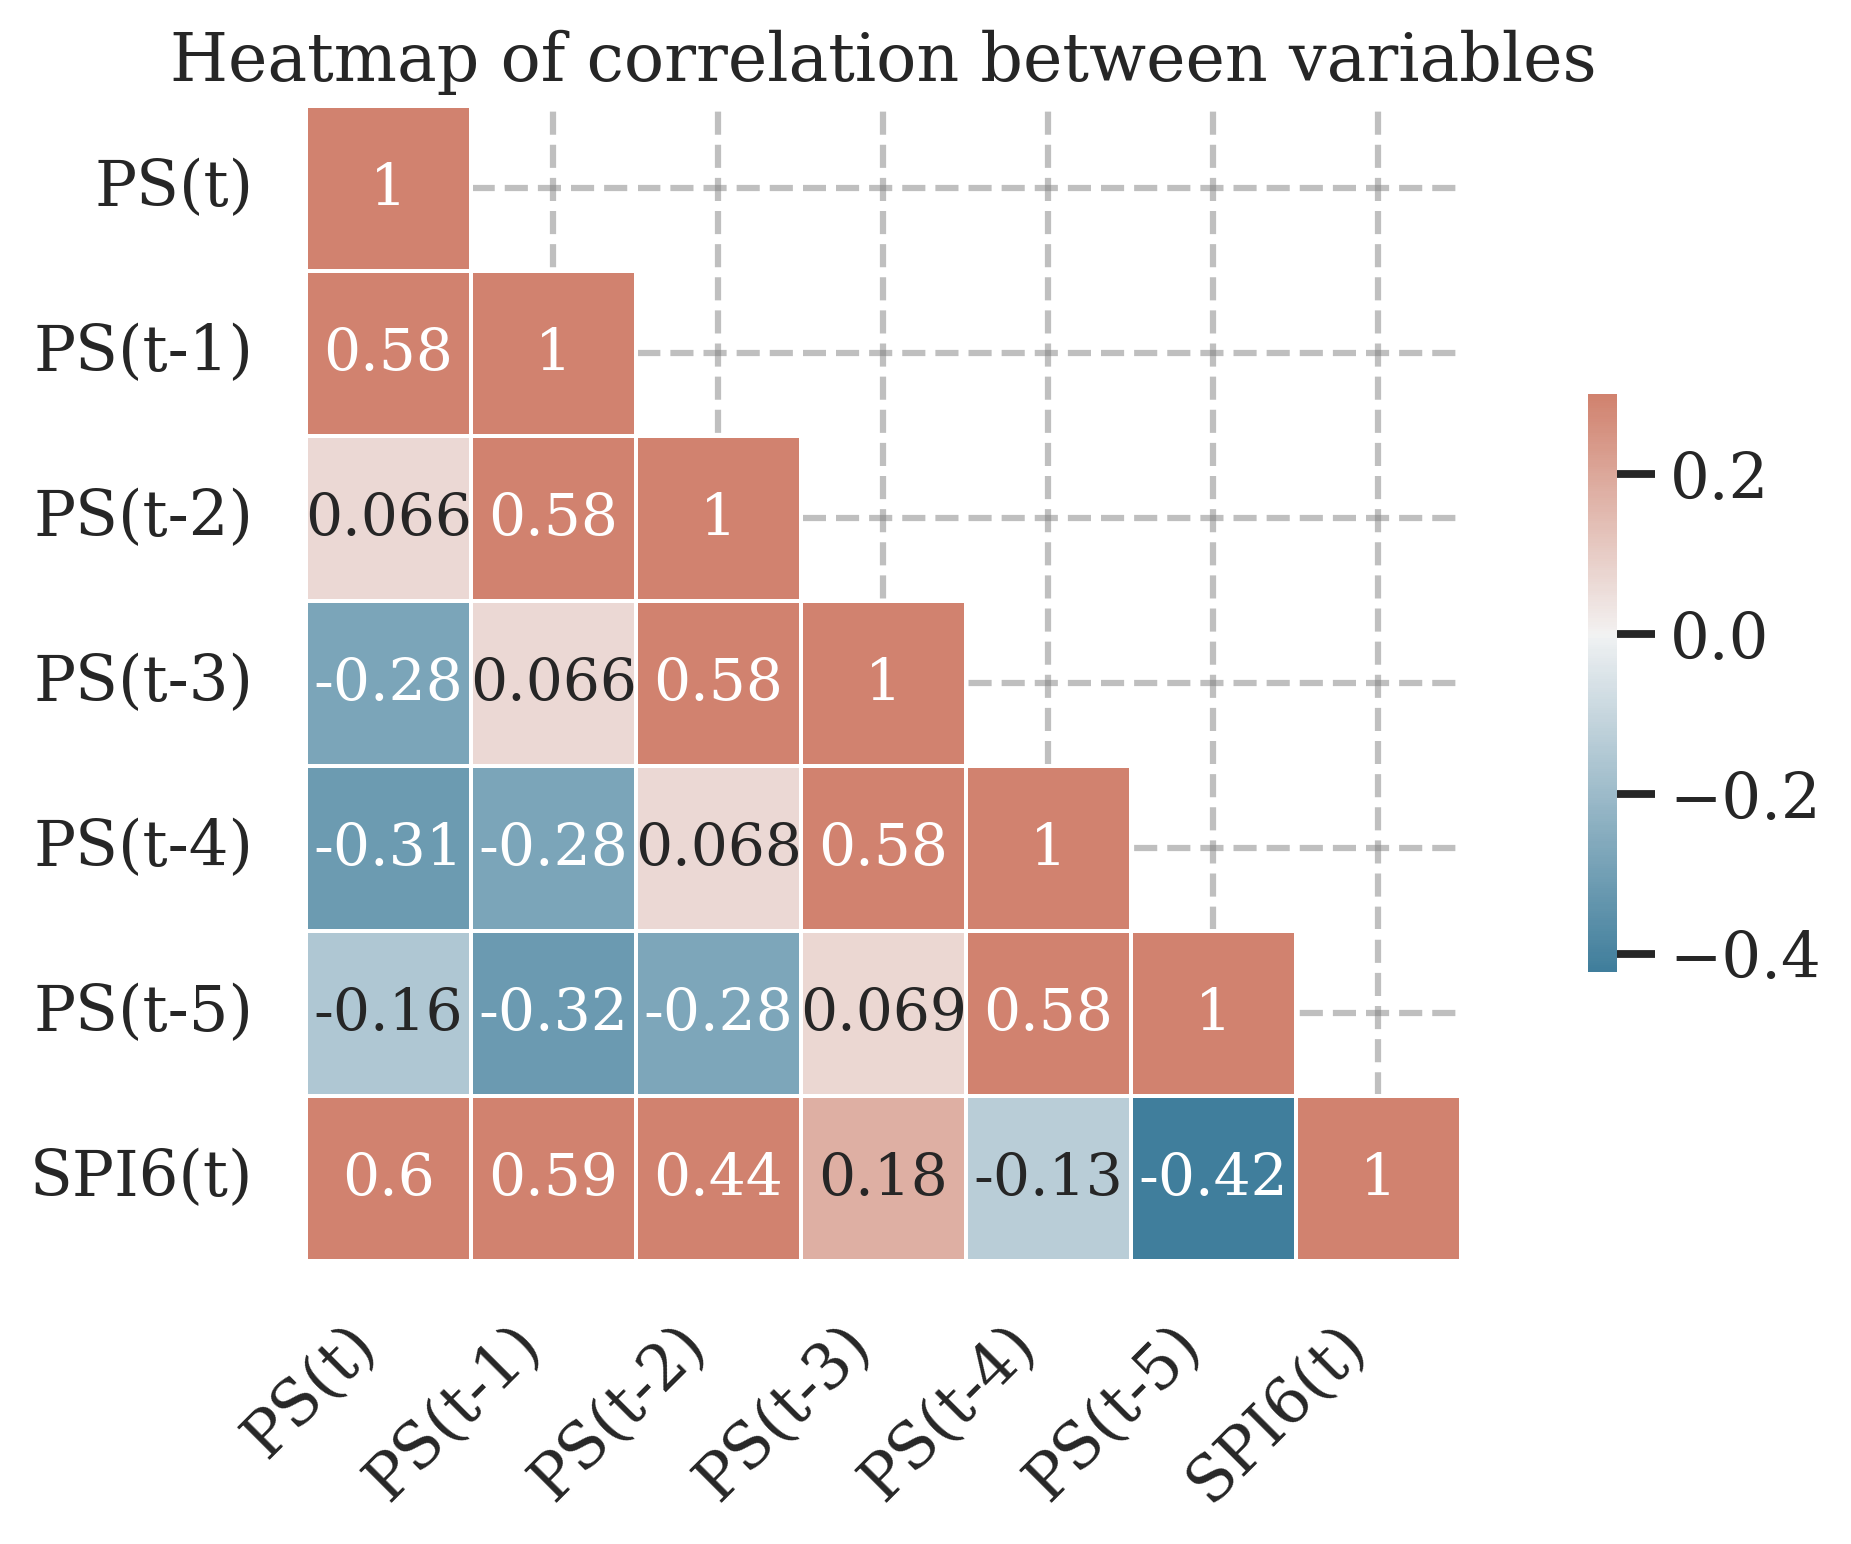

In [33]:
# Compute the correlation matrix : SPI6 and lag PS 

dfm1 = lagged_data[['PS(t)','PS(t-1)', 'PS(t-2)', 'PS(t-3)','PS(t-4)', 'PS(t-5)','SPI6(t)']]

corr = dfm1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [34]:
np.abs(dfm1.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)    1.000000
PS(t)      0.599569
PS(t-1)    0.587211
PS(t-2)    0.435686
PS(t-5)    0.422715
PS(t-3)    0.179776
PS(t-4)    0.134727
Name: SPI6(t), dtype: float64

#####  le lag 0 : PS(t) est le plus correllé avec un coef de 0.59

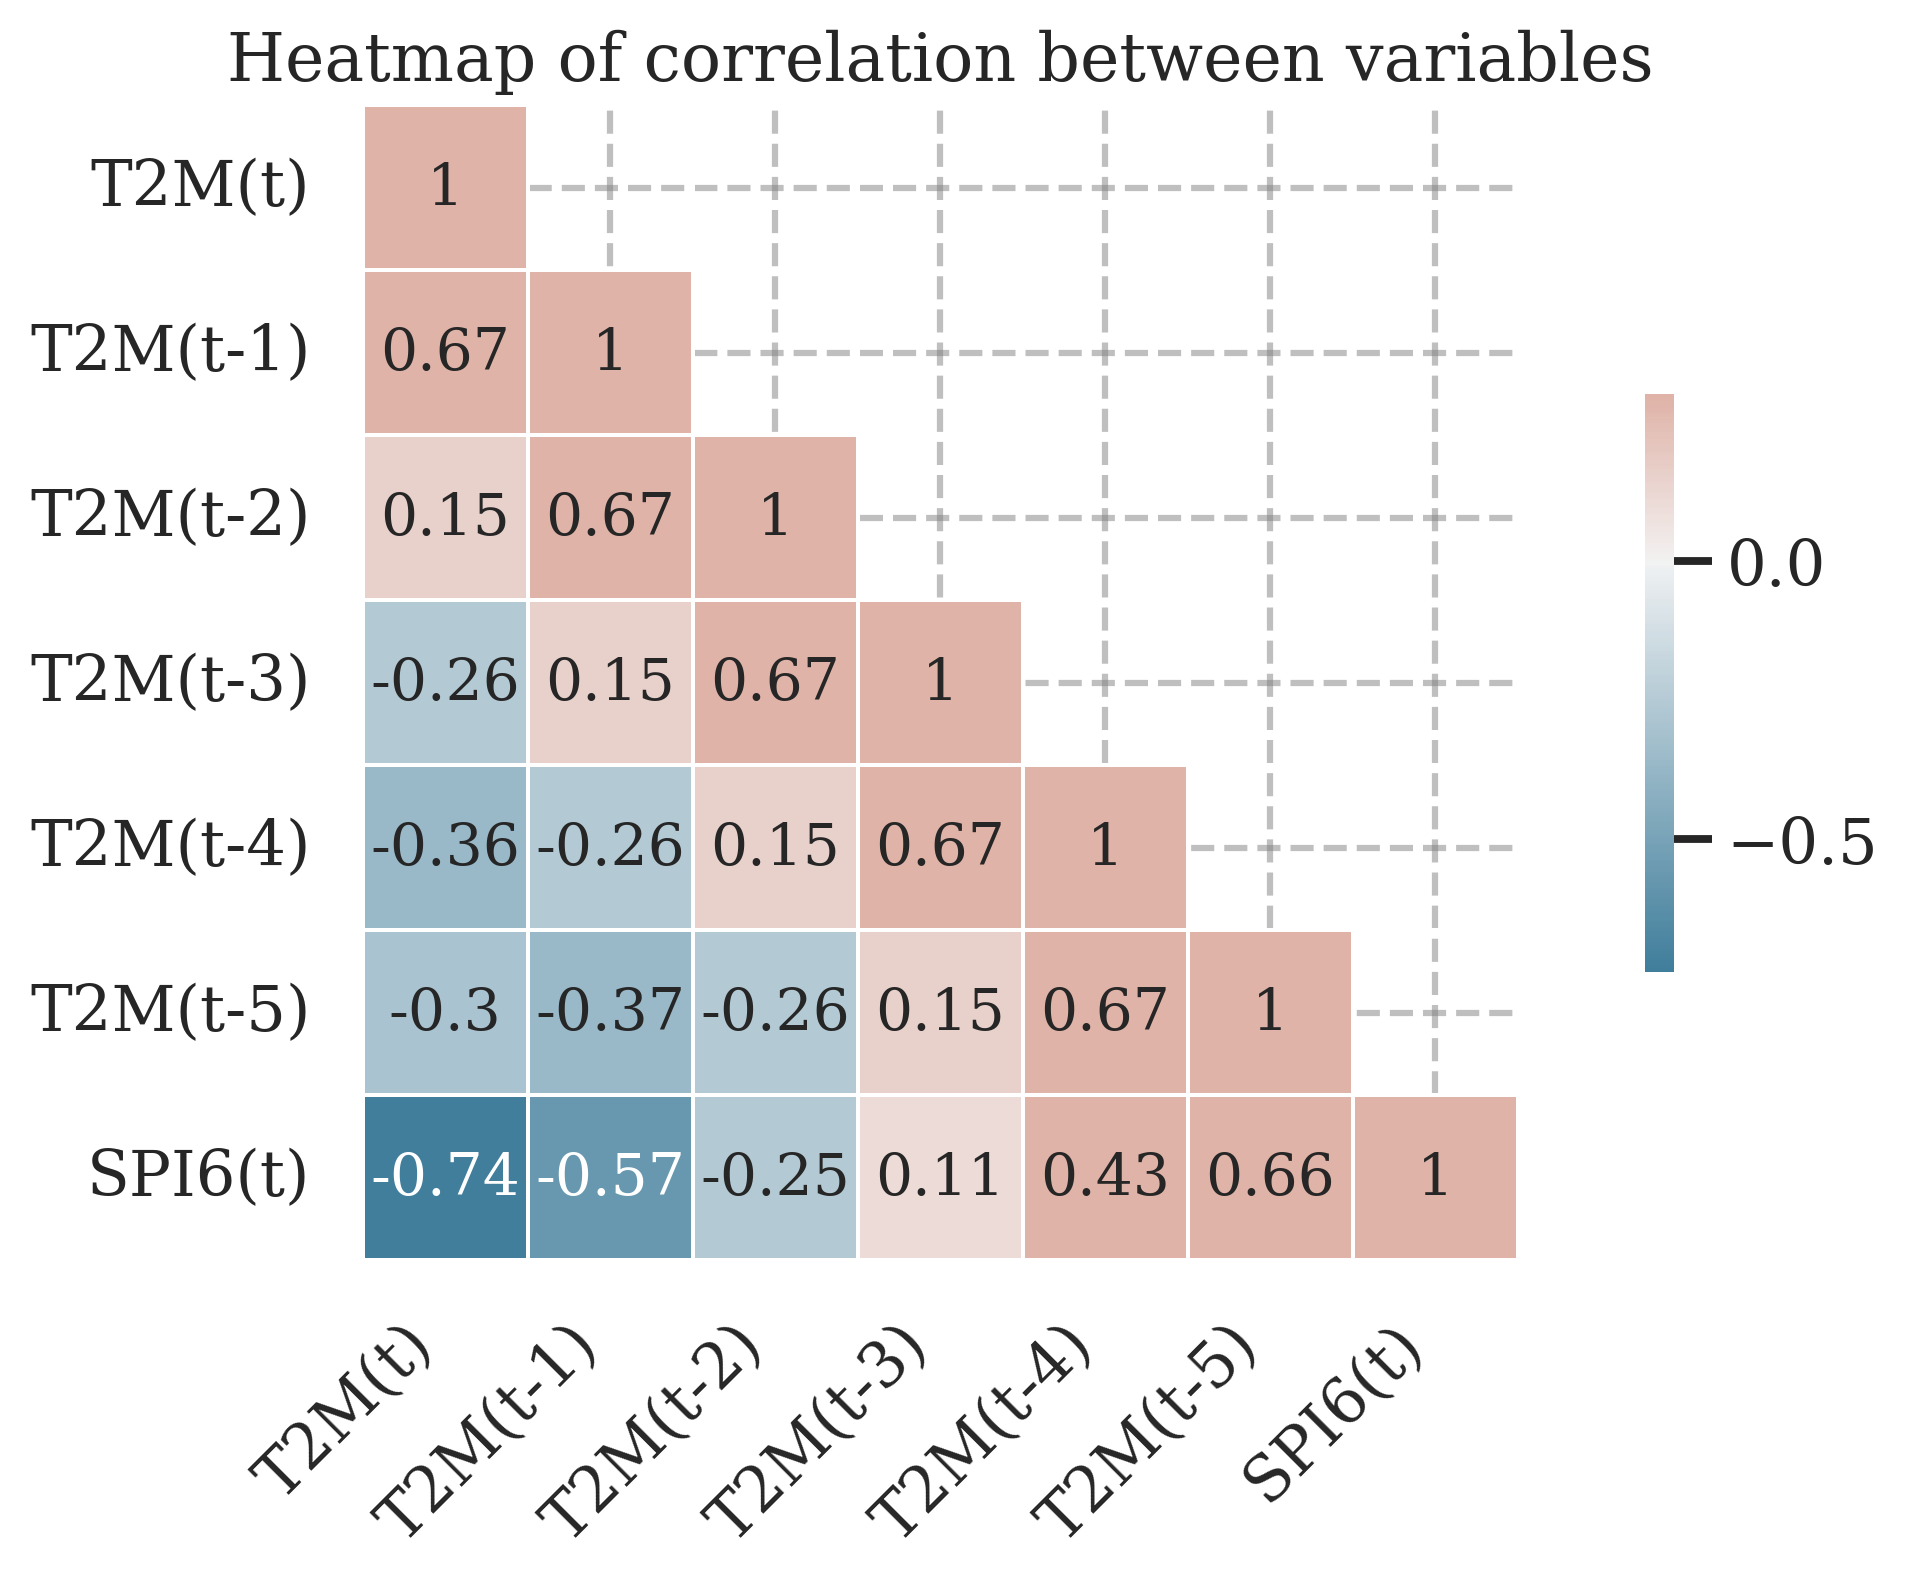

In [35]:
# Compute the correlation matrix : SPI6 and lag T2M

dfm2 = lagged_data[['T2M(t)','T2M(t-1)', 'T2M(t-2)', 'T2M(t-3)','T2M(t-4)', 'T2M(t-5)','SPI6(t)']]

corr = dfm2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [36]:
np.abs(dfm2.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)     1.000000
T2M(t)      0.738695
T2M(t-5)    0.657392
T2M(t-1)    0.566377
T2M(t-4)    0.433566
T2M(t-2)    0.254938
T2M(t-3)    0.107446
Name: SPI6(t), dtype: float64

#### le lag 0 T2M(t) est le plus correlé avec 0.73

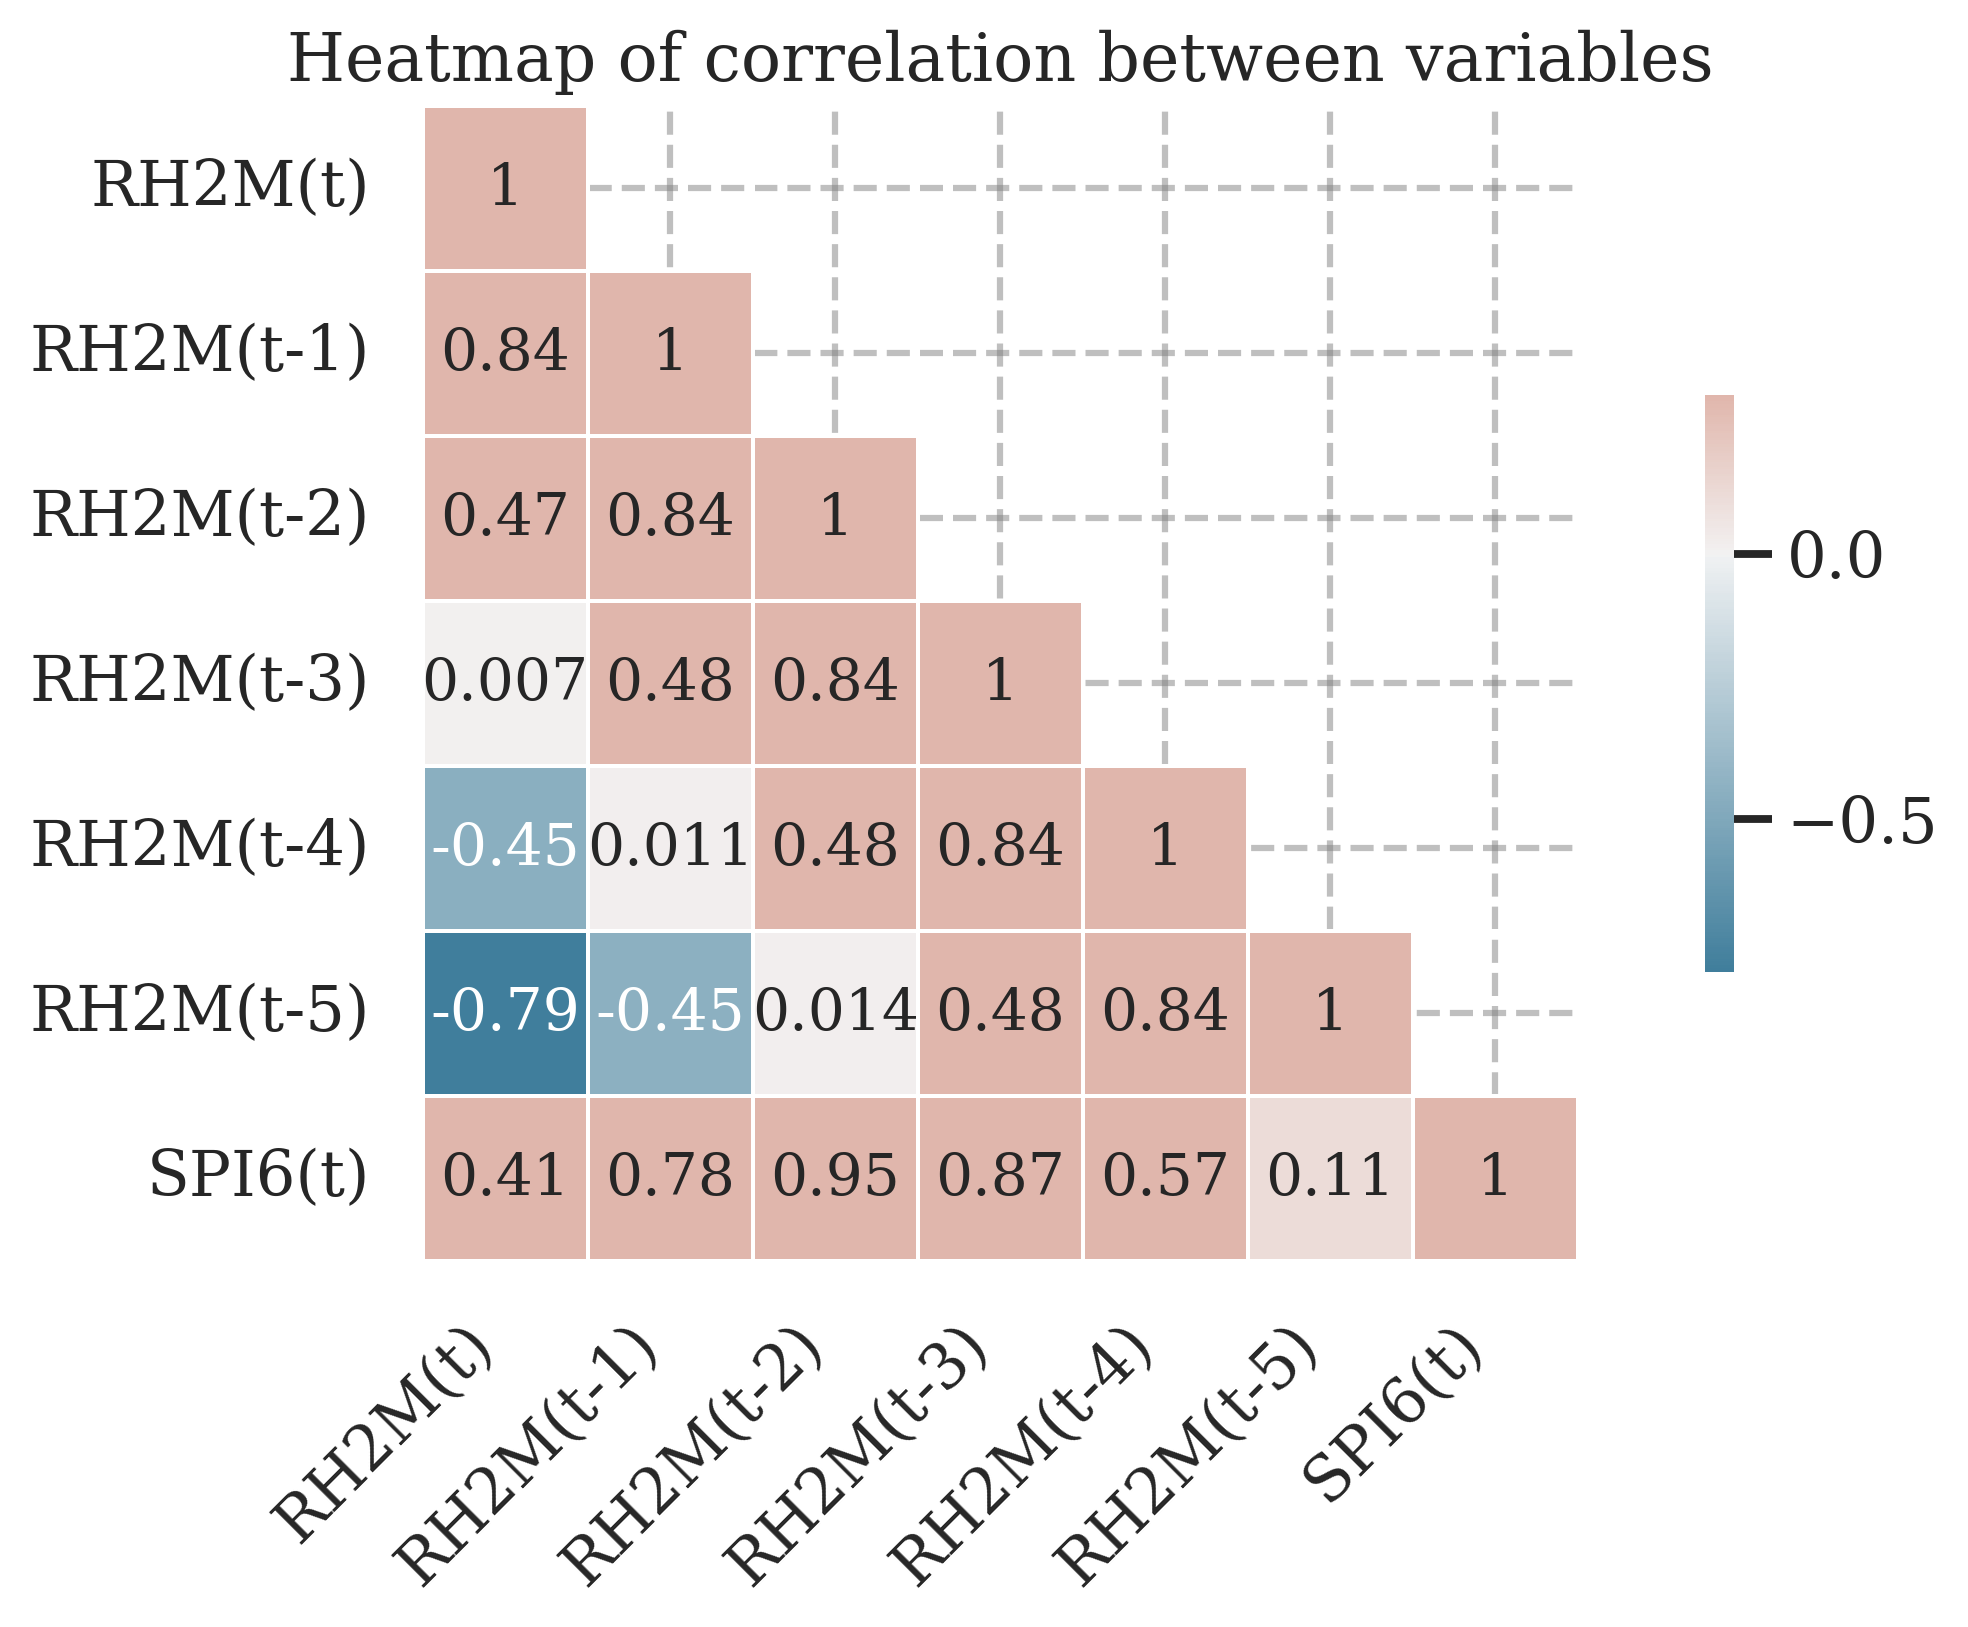

In [37]:
# Compute the correlation matrix : SPI6 and lag RH2M

dfm3 = lagged_data[['RH2M(t)','RH2M(t-1)', 'RH2M(t-2)', 'RH2M(t-3)','RH2M(t-4)', 'RH2M(t-5)','SPI6(t)']]

corr = dfm3.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [38]:
np.abs(dfm3.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
RH2M(t-2)    0.948855
RH2M(t-3)    0.871963
RH2M(t-1)    0.784055
RH2M(t-4)    0.566505
RH2M(t)      0.414912
RH2M(t-5)    0.105775
Name: SPI6(t), dtype: float64

le lag 2 RH2M(t-2) est le plus correlé avec un coefficient de     0.948855

In [39]:
lagged_data.columns

Index(['PS(t-5)', 'T2M(t-5)', 'RH2M(t-5)', 'WS2M(t-5)', 'GWETPROF(t-5)',
       'PRECTOTCORR_SUM(t-5)', 'SPI6(t-5)', 'PS(t-4)', 'T2M(t-4)', 'RH2M(t-4)',
       'WS2M(t-4)', 'GWETPROF(t-4)', 'PRECTOTCORR_SUM(t-4)', 'SPI6(t-4)',
       'PS(t-3)', 'T2M(t-3)', 'RH2M(t-3)', 'WS2M(t-3)', 'GWETPROF(t-3)',
       'PRECTOTCORR_SUM(t-3)', 'SPI6(t-3)', 'PS(t-2)', 'T2M(t-2)', 'RH2M(t-2)',
       'WS2M(t-2)', 'GWETPROF(t-2)', 'PRECTOTCORR_SUM(t-2)', 'SPI6(t-2)',
       'PS(t-1)', 'T2M(t-1)', 'RH2M(t-1)', 'WS2M(t-1)', 'GWETPROF(t-1)',
       'PRECTOTCORR_SUM(t-1)', 'SPI6(t-1)', 'PS(t)', 'T2M(t)', 'RH2M(t)',
       'WS2M(t)', 'GWETPROF(t)', 'PRECTOTCORR_SUM(t)', 'SPI6(t)'],
      dtype='object')

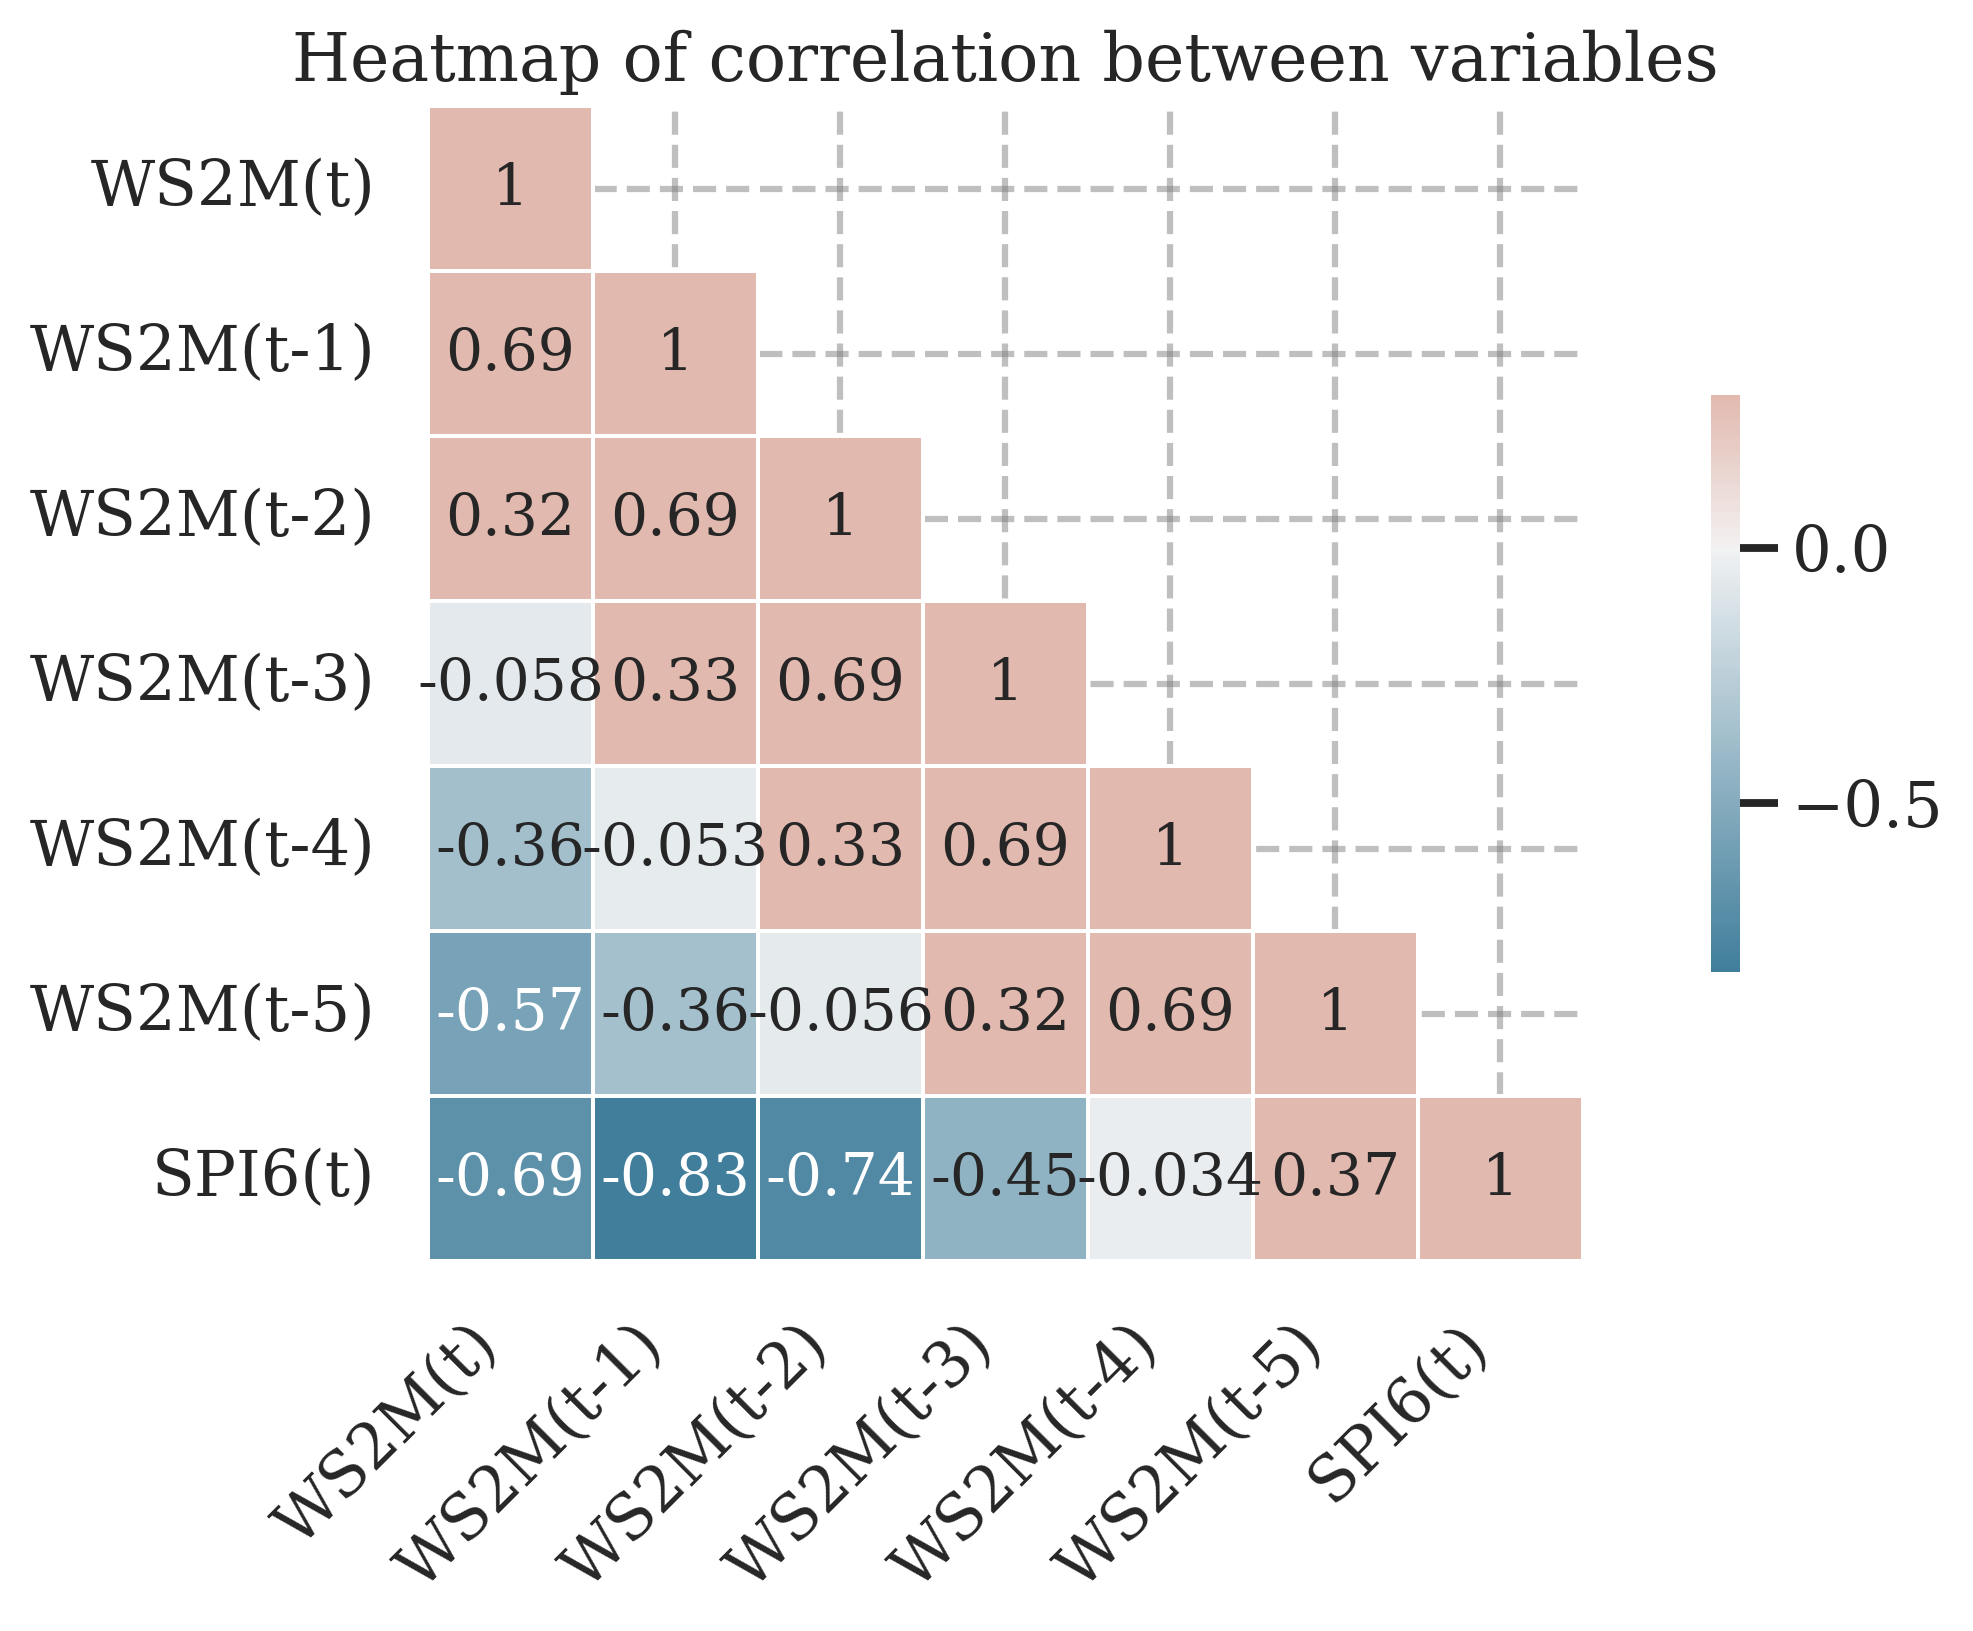

In [40]:
# Compute the correlation matrix : SPI6 and lag WS2M

dfm4 = lagged_data[['WS2M(t)','WS2M(t-1)', 'WS2M(t-2)', 'WS2M(t-3)','WS2M(t-4)', 'WS2M(t-5)','SPI6(t)']]

corr = dfm4.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [41]:
np.abs(dfm4.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
WS2M(t-1)    0.831984
WS2M(t-2)    0.744489
WS2M(t)      0.692897
WS2M(t-3)    0.448965
WS2M(t-5)    0.369990
WS2M(t-4)    0.034292
Name: SPI6(t), dtype: float64

le lag 1 WS2M(t-1)  est le plus correlé avec SPI6(t)  : 0.83

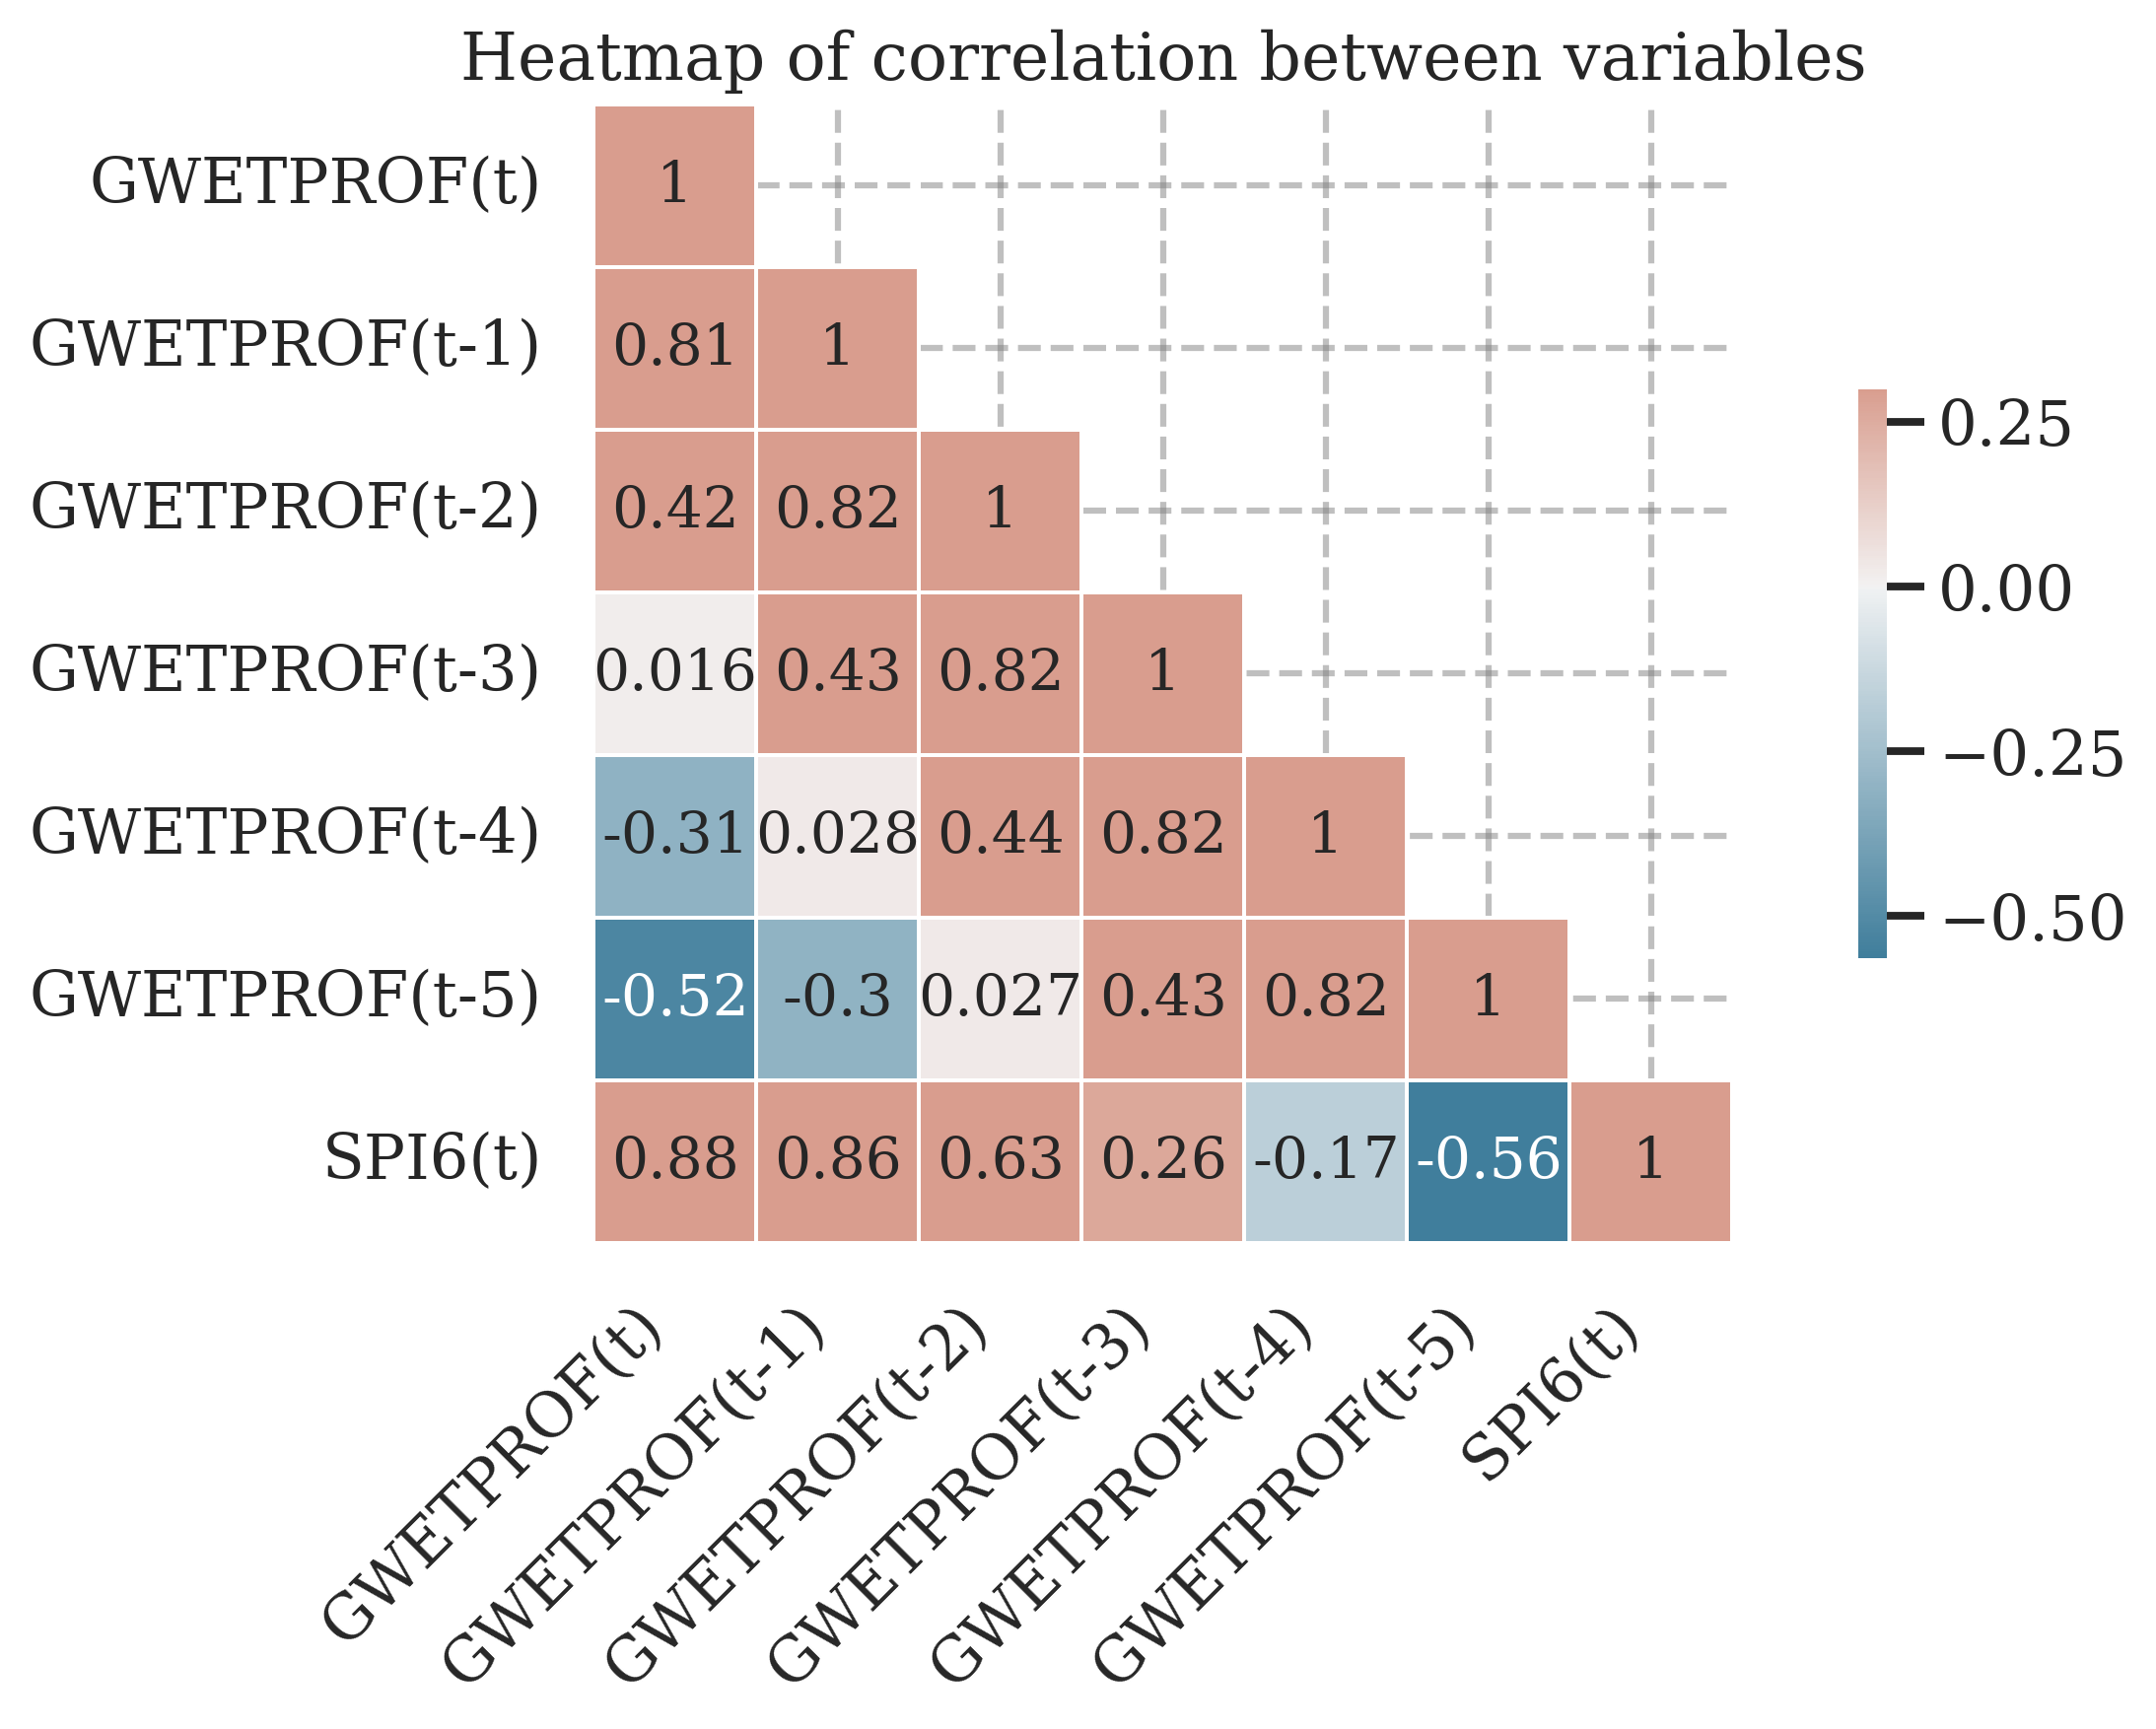

In [42]:
# Compute the correlation matrix : SPI6 and lag GWETPROF

dfm5 = lagged_data[['GWETPROF(t)','GWETPROF(t-1)', 'GWETPROF(t-2)', 'GWETPROF(t-3)','GWETPROF(t-4)', 'GWETPROF(t-5)','SPI6(t)']]

corr = dfm5.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [43]:
np.abs(dfm5.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)          1.000000
GWETPROF(t)      0.883425
GWETPROF(t-1)    0.859451
GWETPROF(t-2)    0.629451
GWETPROF(t-5)    0.564295
GWETPROF(t-3)    0.262879
GWETPROF(t-4)    0.170286
Name: SPI6(t), dtype: float64

le lag 0 est le plus correlé : GWETPROF(t)      0.883425

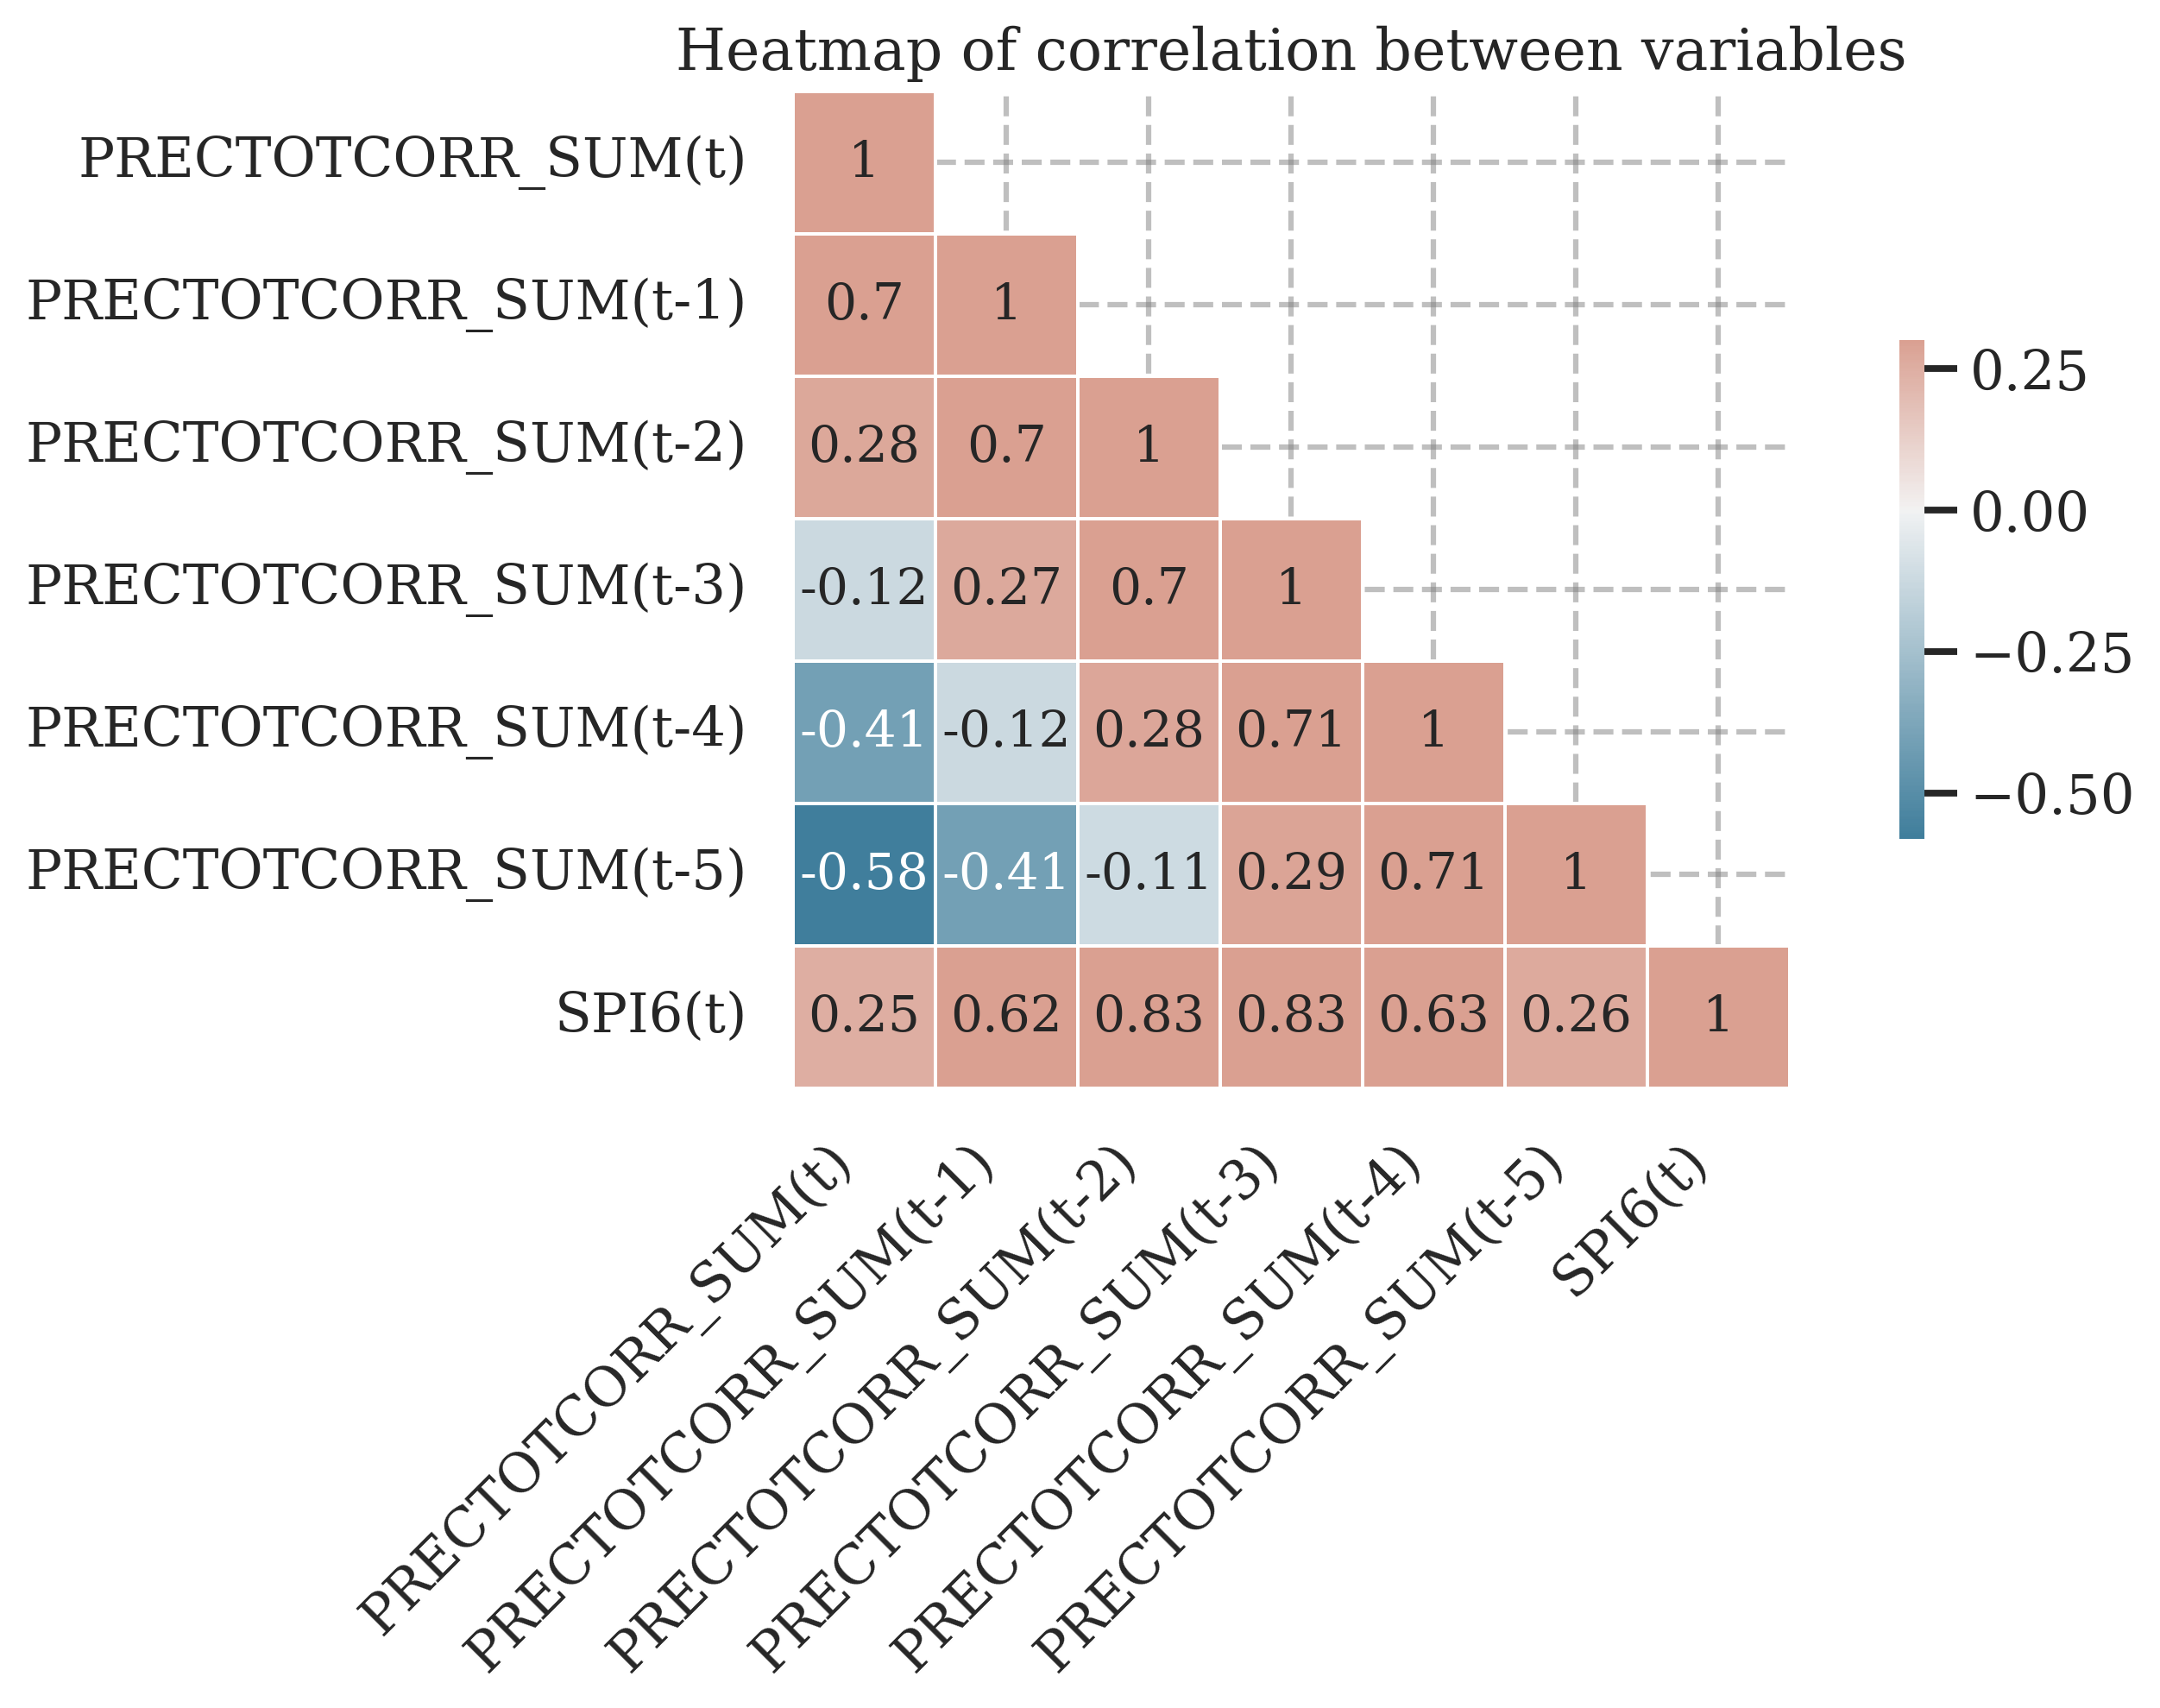

In [44]:
# Compute the correlation matrix : SPI6 and lag PRECTOTCORR_SUM

dfm6 = lagged_data[['PRECTOTCORR_SUM(t)','PRECTOTCORR_SUM(t-1)', 'PRECTOTCORR_SUM(t-2)', 
                    'PRECTOTCORR_SUM(t-3)','PRECTOTCORR_SUM(t-4)', 'PRECTOTCORR_SUM(t-5)','SPI6(t)']]

corr = dfm6.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [45]:
np.abs(dfm6.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)                 1.000000
PRECTOTCORR_SUM(t-3)    0.830974
PRECTOTCORR_SUM(t-2)    0.827751
PRECTOTCORR_SUM(t-4)    0.632285
PRECTOTCORR_SUM(t-1)    0.621049
PRECTOTCORR_SUM(t-5)    0.262750
PRECTOTCORR_SUM(t)      0.248593
Name: SPI6(t), dtype: float64

le lag 3 est le plus correllé PRECTOTCORR_SUM(t-3)    0.830974

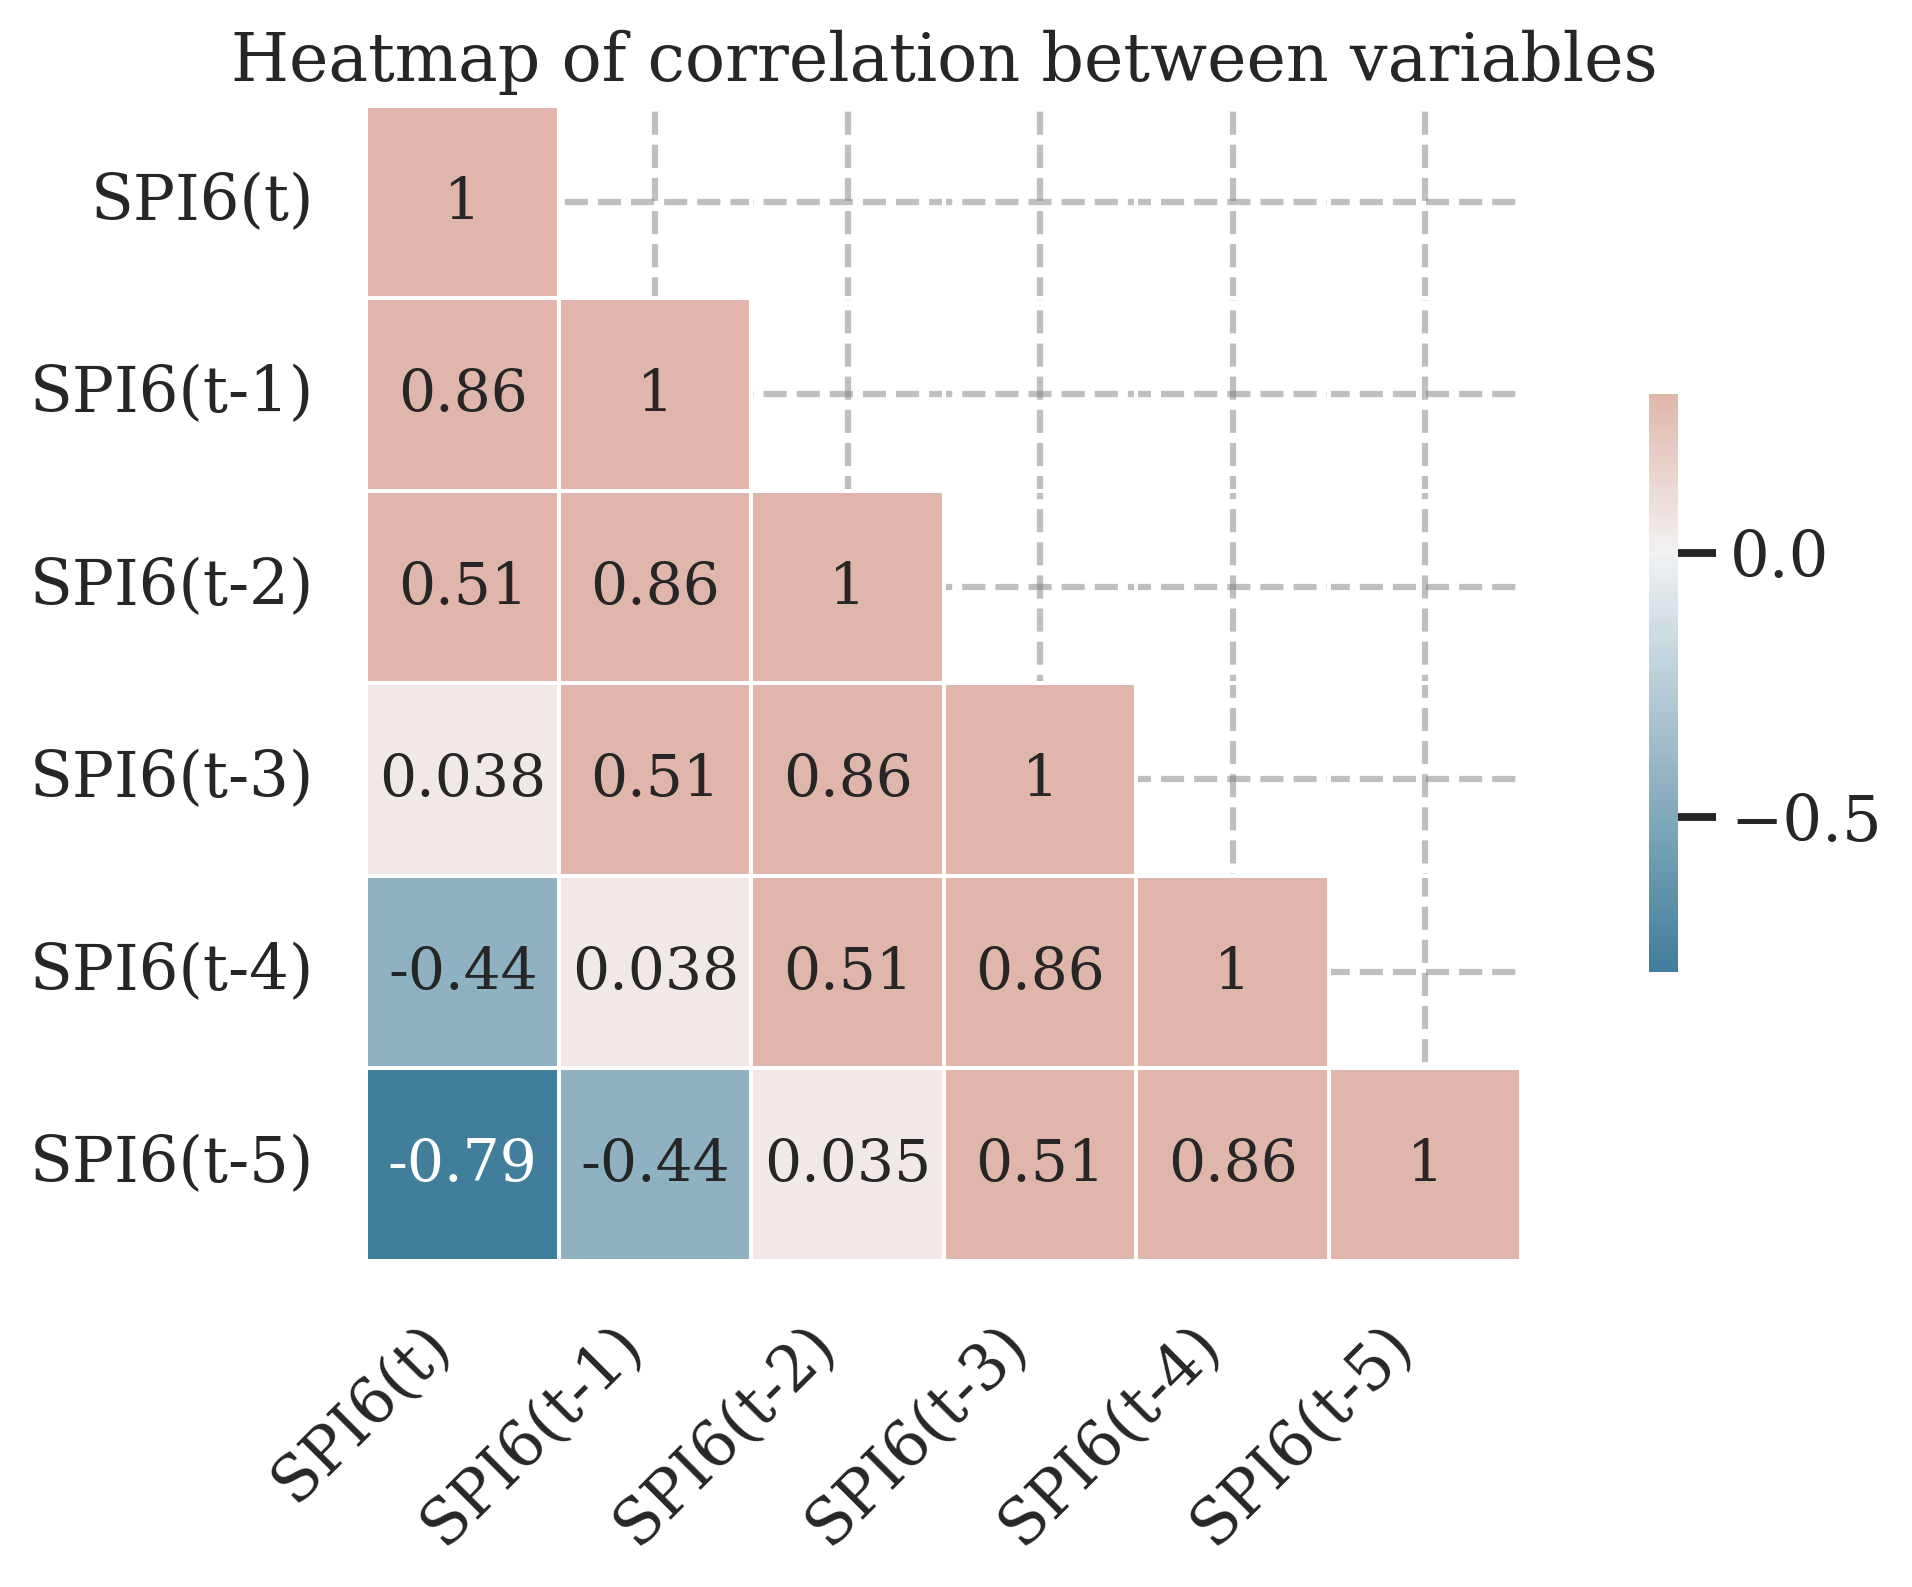

In [46]:
# Compute the correlation matrix : SPI6 and lag SPI6

dfm7 = lagged_data[['SPI6(t)','SPI6(t-1)', 'SPI6(t-2)', 
                    'SPI6(t-3)','SPI6(t-4)', 'SPI6(t-5)']]

corr = dfm7.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [47]:
np.abs(dfm7.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
SPI6(t-1)    0.861646
SPI6(t-5)    0.794203
SPI6(t-2)    0.507602
SPI6(t-4)    0.435395
SPI6(t-3)    0.037580
Name: SPI6(t), dtype: float64

##### le lag 1 est le plus correllé SPI6(t-1)    0.861646

New dataset by choosing each  new lag

In [48]:
final_lagged_data = lagged_data[['PS(t)', 'T2M(t)', 'RH2M(t-2)','WS2M(t-1)',
                                 'GWETPROF(t)', 'PRECTOTCORR_SUM(t-3)', 'SPI6(t-1)', 'SPI6(t)']] 

final_lagged_data.head()

,PS(t),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t),PRECTOTCORR_SUM(t-3),SPI6(t-1),SPI6(t)
DATE,,,,,,,,
1981-11-30,0.191011,-0.647416,0.934598,-0.825095,0.111111,0.483897,2.122502,1.778858
1981-12-31,0.191011,-0.683891,0.707442,-0.346008,-0.259259,0.129041,1.778858,0.957909
1982-01-31,0.101124,-0.586626,0.152200,-0.292776,-0.555556,-1.000000,0.957909,0.098800
1982-02-28,-0.168539,-0.240122,-0.184228,0.140684,-0.703704,-1.000000,0.098800,-0.722149
1982-03-31,-0.393258,0.258359,-0.559144,-0.019011,-0.777778,-1.000000,-0.722149,-1.352162


### Create lags with raw data to prevent data leakage
To prevent data leakage, we save the not normalized data, and then we will split, then normalize the training data, and finally, apply the normalization parameters to the test data.

In [49]:
final_lagged_data.columns

Index(['PS(t)', 'T2M(t)', 'RH2M(t-2)', 'WS2M(t-1)', 'GWETPROF(t)',
       'PRECTOTCORR_SUM(t-3)', 'SPI6(t-1)', 'SPI6(t)'],
      dtype='object')

In [50]:
lagged_data_raw = create_lagged_features(data= data, 
                                      col_names=data.columns,
                                      n_in=data_params['window_size'],
                                      n_out=data_params['n_output_steps'],
                                      dropnan=True)

lagged_data_raw

,PS(t-5),T2M(t-5),RH2M(t-5),WD2M(t-5),WS2M(t-5),GWETPROF(t-5),PRECTOTCORR_SUM(t-5),SPI6(t-5),PS(t-4),T2M(t-4),...,PRECTOTCORR_SUM(t-1),SPI6(t-1),PS(t),T2M(t),RH2M(t),WD2M(t),WS2M(t),GWETPROF(t),PRECTOTCORR_SUM(t),SPI6(t)
DATE,,,,,,,,,,,,,,,,,,,,,
1981-11-30,97.99,28.12,71.06,220.44,2.39,0.54,226.76,-0.111216,98.03,25.51,...,0.00,2.122502,97.99,23.39,55.12,82.44,2.05,0.63,0.00,1.778858
1981-12-31,98.03,25.51,82.50,230.19,2.16,0.62,237.30,0.747892,98.02,25.32,...,0.00,1.778858,97.99,23.15,42.62,74.19,2.12,0.58,0.00,0.957909
1982-01-31,98.02,25.32,84.00,231.25,1.62,0.66,242.58,1.626116,98.04,25.25,...,0.00,0.957909,97.95,23.79,28.69,42.44,2.69,0.54,0.00,0.098800
1982-02-28,98.04,25.25,84.19,222.94,1.49,0.75,184.57,2.275244,97.92,26.27,...,0.00,0.098800,97.83,26.07,33.44,65.69,2.48,0.52,15.82,-0.722149
1982-03-31,97.92,26.27,75.75,201.06,1.42,0.71,0.00,2.122502,97.99,23.39,...,15.82,-0.722149,97.73,29.35,36.56,72.44,2.53,0.51,10.55,-1.352162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,97.70,30.77,34.38,112.19,2.85,0.49,15.82,-1.142182,97.64,32.76,...,187.35,-0.176165,98.04,25.60,85.19,224.38,1.54,0.59,274.77,0.818598
2021-09-30,97.64,32.76,38.12,193.50,2.92,0.48,9.58,-1.355674,97.77,32.58,...,274.77,0.818598,98.02,25.99,83.31,201.19,1.38,0.66,174.17,1.391880
2021-10-31,97.77,32.58,51.00,210.50,2.98,0.48,34.88,-1.229396,97.96,28.95,...,174.17,1.391880,97.91,27.53,71.56,131.94,1.31,0.63,27.63,1.457227


In [51]:
lagged_data_path = data_params['data_path'] + 'lagged/' + data_params['city'] + '_lagged_raw.csv'
lagged_data_raw[final_lagged_data.columns].to_csv(lagged_data_path)

In [52]:
pd.read_csv('../datasets/lagged/Banikoara_lagged_raw.csv').describe()

,PS(t),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t),PRECTOTCORR_SUM(t-3),SPI6(t-1),SPI6(t)
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,97.903714,27.577033,53.005954,2.252925,0.532220,66.330560,-0.011400,-0.013819
std,0.147378,2.589628,23.294432,0.554037,0.051013,80.193653,0.995446,0.991660
min,97.460000,21.070000,12.310000,1.190000,0.480000,0.000000,-1.447631,-1.447631
25%,97.802500,25.800000,30.907500,1.782500,0.490000,0.000000,-0.970360,-0.970360
50%,97.940000,26.870000,54.750000,2.285000,0.520000,26.370000,-0.025305,-0.025305
75%,98.010000,29.370000,75.362500,2.650000,0.560000,126.560000,0.914926,0.914926
max,98.350000,34.230000,86.620000,3.820000,0.690000,326.950000,2.122502,1.969759
